In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# reading the records


In [ ]:
data = pd.read_csv('/content/Churn_ Data.csv')

In [ ]:
data.head()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0          -0.17                 1  ...                    0.454642   
1          -0.32                 3  ...                    0.343190   
2          -0.05                 3  ...                    0.101838   
3          -0.18                 4  ...                    0.066602   
4           0.01                 4  ...                    0.219821   

   prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0            0.497397               4.0                0.0   
1            0.767617               6.0                0.0   
2            0.619034               6.0                1.0   
3            0.437088               7.0                2.0   
4            0.585977               6.0                1.0   

   s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                 9.0              6.02           8.20           46.465636   
1                20.0              3.66           8.10           34.525456   
2                19.0              4.33           4.36           10.298451   
3                11.0              3.40           3.53            6.670783   
4                14.0              3.85           3.87           21.998905   

   prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0                    0.609456       0.22  
1                    1.000000       0.38  
2                    0.699592       0.11  
3                    0.086617       5.18  
4                    0.683105       0.10  

[5 rows x 111 columns]

In [ ]:
data.tail()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
1782             -0.15        86.9440          2.702583           2.702583   
1783             -0.45       124.9325          1.910989           2.173207   
1784              0.60       320.9684          5.732024           5.766583   
1785             -0.19       206.6600          1.357124           2.033314   
1786              0.60       286.1405          7.116343           8.451892   

      s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
1782              4                 6           0.00            86.944   
1783              7                16          32.50           103.816   
1784              7                68         263.00           298.261   
1785              7                33         103.33           206.660   
1786              5                12          35.57           234.905   

      s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
1782          -0.05                 3  ...                    0.381507   
1783          -0.03                 4  ...                    0.382341   
1784           0.31                 4  ...                    0.250917   
1785          -0.06                 3  ...                    0.633517   
1786           0.44                 1  ...                         NaN   

      prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
1782            0.567804               5.0                2.0   
1783            0.390055               7.0                2.0   
1784            0.276350               7.0                3.0   
1785            0.629913               6.0                0.0   
1786                 NaN               NaN                NaN   

      s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
1782                 0.0              6.02           6.02           38.155499   
1783                 2.0              3.27           3.39           38.485560   
1784                 0.0              8.41          11.11           66.776030   
1785                 2.0              3.88           5.42           63.806862   
1786                 NaN               NaN            NaN                 NaN   

      prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
1782                    0.056514       0.95  
1783                    0.319593       4.34  
1784                    0.179610       5.43  
1785                    0.552976       4.44  
1786                         NaN        NaN  

[5 rows x 111 columns]

In [ ]:
data.describe()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
count       1787.000000    1787.000000       1787.000000        1787.000000   
mean          -0.016553     287.085565          5.075877           7.207729   
std            0.972608     280.731104          4.543534           6.614820   
min           -1.000000       0.000000          0.035000           0.035000   
25%           -0.590000     105.742600          2.443803           3.411587   
50%           -0.160000     208.821500          3.811706           5.385970   
75%            0.290000     379.265900          6.075771           8.578872   
max           14.420000    2777.352000         53.323503         125.999778   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
count    1787.000000       1787.000000    1787.000000       1787.000000   
mean        5.374370         28.176273      69.560783        224.822400   
std         2.235886         27.223922      58.537855        240.075234   
min         0.000000          0.000000       0.000000          0.000000   
25%         4.000000          9.000000      32.540000         77.641500   
50%         7.000000         21.000000      51.800000        154.805000   
75%         7.000000         39.000000      88.535000        294.736000   
max         7.000000        202.000000     650.000000       2765.360000   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
count    1787.000000       1787.000000  ...                 1786.000000   
mean       -0.035618          3.245104  ...                    0.540394   
std         0.384568          1.196450  ...                    0.211280   
min        -5.090000          0.000000  ...                    0.000538   
25%        -0.170000          3.000000  ...                    0.393630   
50%        -0.030000          4.000000  ...                    0.545907   
75%         0.125000          4.000000  ...                    0.690474   
max         2.030000          4.000000  ...                    0.997237   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
count         1786.000000       1786.000000        1786.000000   
mean             0.495625          5.689250           1.926652   
std              0.272981          1.951877           3.201837   
min              0.000000          0.000000           0.000000   
25%              0.273971          5.000000           0.000000   
50%              0.488896          7.000000           0.000000   
75%              0.710780          7.000000           2.000000   
max              1.000000          7.000000          14.000000   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
count         1786.000000       1786.000000    1786.000000   
mean             8.716685          8.247402      12.608208   
std              9.222632          6.566836      12.037727   
min              0.000000          0.080000       0.080000   
25%              1.000000          4.270000       6.270000   
50%              5.000000          6.385000       9.485000   
75%             15.000000          9.925000      14.787500   
max             30.000000         66.800000     279.580000   

       prop.og.mou.any.p6  prop.loc.i2i.mou.og.mou.p3    s3.rev.p1  
count         1786.000000                 1786.000000  1786.000000  
mean            53.783263                    0.492295    10.116036  
std             21.586303                    0.291565    17.549964  
min              0.000000                    0.000000     0.000000  
25%             39.421287                    0.265523     1.972500  
50%             54.356865                    0.485839     5.425000  
75%             68.527008                    0.728828    11.220000  
max             99.735795                    1.000000   355.460000  

[8 rows x 111 columns]

In [ ]:
data.select_dtypes(include=[np.number])

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                -0.76        88.0482          3.106604           3.754955   
1                -0.98        67.5039          3.094574           5.550865   
2                -0.98        33.9248          2.324016           2.438114   
3                -0.92        82.6780          2.630749           2.858961   
4                -0.97        96.8379          2.674316           2.912397   
...                ...            ...               ...                ...   
1782             -0.15        86.9440          2.702583           2.702583   
1783             -0.45       124.9325          1.910989           2.173207   
1784              0.60       320.9684          5.732024           5.766583   
1785             -0.19       206.6600          1.357124           2.033314   
1786              0.60       286.1405          7.116343           8.451892   

      s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0                 4                14          39.29            57.320   
1                 1                 2          21.67            38.700   
2                 2                 3          30.00            15.320   
3                 2                 3          50.00            51.956   
4                 3                 2          22.50            66.886   
...             ...               ...            ...               ...   
1782              4                 6           0.00            86.944   
1783              7                16          32.50           103.816   
1784              7                68         263.00           298.261   
1785              7                33         103.33           206.660   
1786              5                12          35.57           234.905   

      s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0             -0.17                 1  ...                    0.454642   
1             -0.32                 3  ...                    0.343190   
2             -0.05                 3  ...                    0.101838   
3             -0.18                 4  ...                    0.066602   
4              0.01                 4  ...                    0.219821   
...             ...               ...  ...                         ...   
1782          -0.05                 3  ...                    0.381507   
1783          -0.03                 4  ...                    0.382341   
1784           0.31                 4  ...                    0.250917   
1785          -0.06                 3  ...                    0.633517   
1786           0.44                 1  ...                         NaN   

      prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0               0.497397               4.0                0.0   
1               0.767617               6.0                0.0   
2               0.619034               6.0                1.0   
3               0.437088               7.0                2.0   
4               0.585977               6.0                1.0   
...                  ...               ...                ...   
1782            0.567804               5.0                2.0   
1783            0.390055               7.0                2.0   
1784            0.276350               7.0                3.0   
1785            0.629913               6.0                0.0   
1786                 NaN               NaN                NaN   

      s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                    9.0              6.02           8.20           46.465636   
1                   20.0              3.66           8.10           34.525456   
2                   19.0              4.33           4.36           10.298451   
3                   11.0              3.40           3.53            6.670783   
4                   14.0              3.85           3.87           21.998905   
...                  ...

In [ ]:
data.quantile([0.25, 0.5, 0.75])

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0.25             -0.59       105.7426          2.443803           3.411587   
0.50             -0.16       208.8215          3.811706           5.385970   
0.75              0.29       379.2659          6.075771           8.578872   

      s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0.25            4.0               9.0         32.540           77.6415   
0.50            7.0              21.0         51.800          154.8050   
0.75            7.0              39.0         88.535          294.7360   

      s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0.25         -0.170               3.0  ...                    0.393630   
0.50         -0.030               4.0  ...                    0.545907   
0.75          0.125               4.0  ...                    0.690474   

      prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0.25            0.273971               5.0                0.0   
0.50            0.488896               7.0                0.0   
0.75            0.710780               7.0                2.0   

      s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0.25                 1.0             4.270         6.2700           39.421287   
0.50                 5.0             6.385         9.4850           54.356865   
0.75                15.0             9.925        14.7875           68.527008   

      prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0.25                    0.265523     1.9725  
0.50                    0.485839     5.4250  
0.75                    0.728828    11.2200  

[3 rows x 111 columns]

In [ ]:
data.mean()

s6.new.rev.p2.m2               -0.016553
s1.new.rev.m1                 287.085565
s3.og.rev.4db.p5                5.075877
s3.new.rev.4db.p5               7.207729
s4.usg.ins.p2                   5.374370
                                 ...    
s3.og.rev.all.m2                8.247402
s3.new.rev.m2                  12.608208
prop.og.mou.any.p6             53.783263
prop.loc.i2i.mou.og.mou.p3      0.492295
s3.rev.p1                      10.116036
Length: 111, dtype: float64

# Step 2: Remove Duplicate Records

In [ ]:
data.var()

s6.new.rev.p2.m2                  0.945966
s1.new.rev.m1                 78809.952997
s3.og.rev.4db.p5                 20.643698
s3.new.rev.4db.p5                43.755840
s4.usg.ins.p2                     4.999186
                                  ...     
s3.og.rev.all.m2                 43.123333
s3.new.rev.m2                   144.906881
prop.og.mou.any.p6              465.968473
prop.loc.i2i.mou.og.mou.p3        0.085010
s3.rev.p1                       308.001244
Length: 111, dtype: float64

In [ ]:
data.median()

s6.new.rev.p2.m2               -0.160000
s1.new.rev.m1                 208.821500
s3.og.rev.4db.p5                3.811706
s3.new.rev.4db.p5               5.385970
s4.usg.ins.p2                   7.000000
                                 ...    
s3.og.rev.all.m2                6.385000
s3.new.rev.m2                   9.485000
prop.og.mou.any.p6             54.356865
prop.loc.i2i.mou.og.mou.p3      0.485839
s3.rev.p1                       5.425000
Length: 111, dtype: float64

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object' and data[col].str.isnumeric().all():
        data[col] = pd.to_numeric(data[col], errors='coerce')
    elif data[col].dtype == 'int64' and len(data[col].unique()) < 10:
        data[col] = data[col].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: category(9), float64(91), int64(11)
memory usage: 1.4 MB
None


In [ ]:
# Check for duplicate values
duplicate_rows = data.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f'Number of duplicate rows: {num_duplicates}')

# If there are duplicate rows, print some of them to inspect
if num_duplicates > 0:
    print('Duplicate rows:')
    print(data[duplicate_rows].head())

# Drop duplicate rows if any
data = data.drop_duplicates()

# Print the shape of the dataset after dropping duplicates
print(f'Shape of the dataset after dropping duplicates: {data.shape}')

Number of duplicate rows: 0
Shape of the dataset after dropping duplicates: (1787, 111)


# Step 3: Remove Unique Value Variables

In [ ]:
data = data.drop_duplicates()
print(data)

      s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                -0.76        88.0482          3.106604           3.754955   
1                -0.98        67.5039          3.094574           5.550865   
2                -0.98        33.9248          2.324016           2.438114   
3                -0.92        82.6780          2.630749           2.858961   
4                -0.97        96.8379          2.674316           2.912397   
...                ...            ...               ...                ...   
1782             -0.15        86.9440          2.702583           2.702583   
1783             -0.45       124.9325          1.910989           2.173207   
1784              0.60       320.9684          5.732024           5.766583   
1785             -0.19       206.6600          1.357124           2.033314   
1786              0.60       286.1405          7.116343           8.451892   

     s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.

In [ ]:
unique_counts = data.nunique()
data = data.drop(columns=unique_counts[unique_counts == len(data)].index)

# Step 4: Remove Zero Variance Variables

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
zero_var = numeric_data.var()
zero_var_columns = zero_var[zero_var == 0].index
data = data.drop(columns=zero_var_columns)


# Step 5: Outlier Treatment

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))
numeric_data[outliers] = np.nan  # Or apply capping/flooring
data.update(numeric_data)

In [ ]:
z_scores = np.abs(stats.zscore(numeric_data))
outliers = (z_scores > 3)
numeric_data[outliers] = np.nan  # Or apply capping/flooring
data.update(numeric_data)

# Step 6: Missing Value Treatment

In [ ]:
threshold = 0.05 * len(data.columns)
data = data.dropna(thresh=threshold)

In [ ]:
data = data.dropna(axis=1, thresh=0.5 * len(data))

In [ ]:
# Impute missing values
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

for col in data.select_dtypes(include=['category', 'object']).columns:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Step 7: Remove Highly Correlated Variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

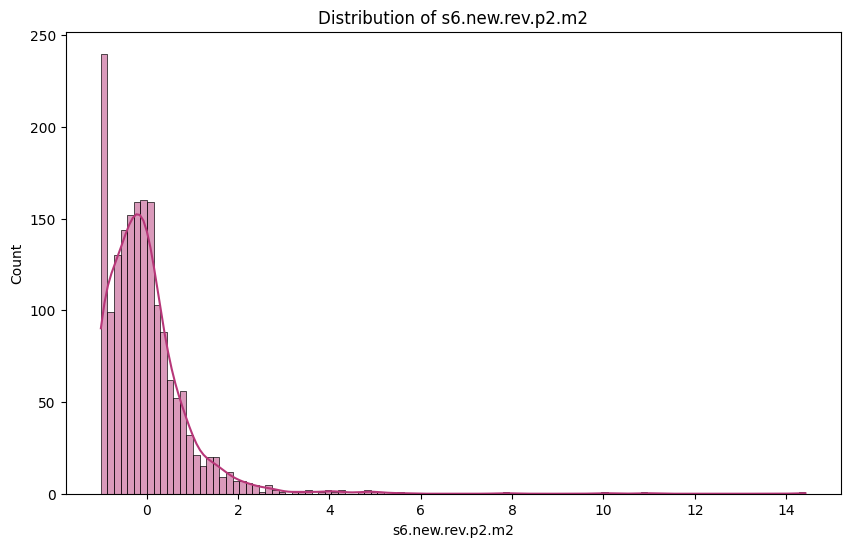

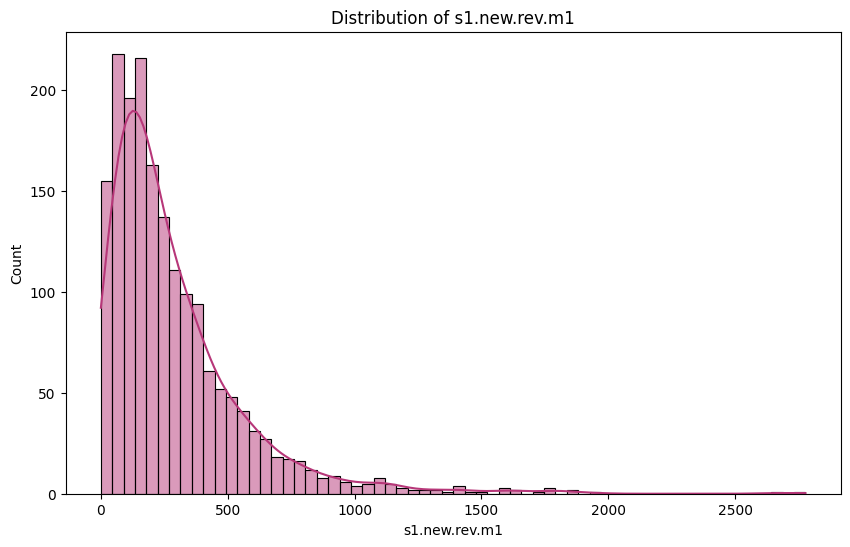

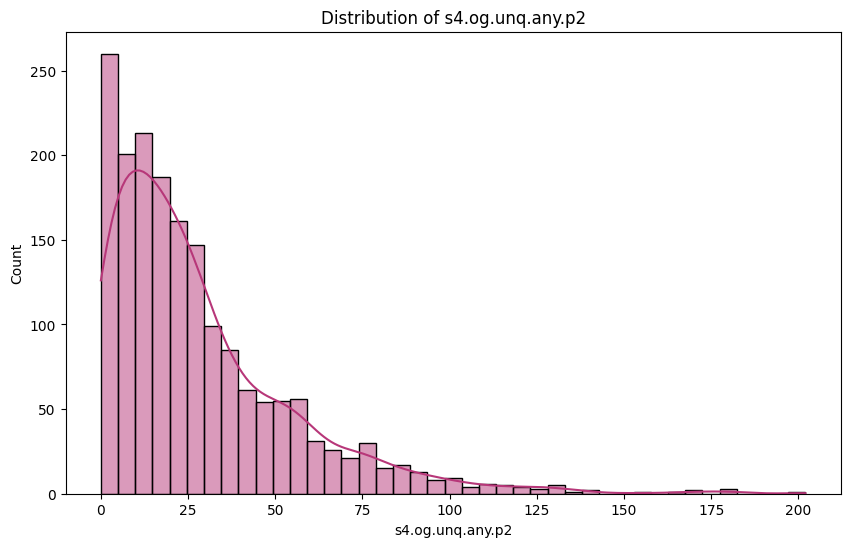

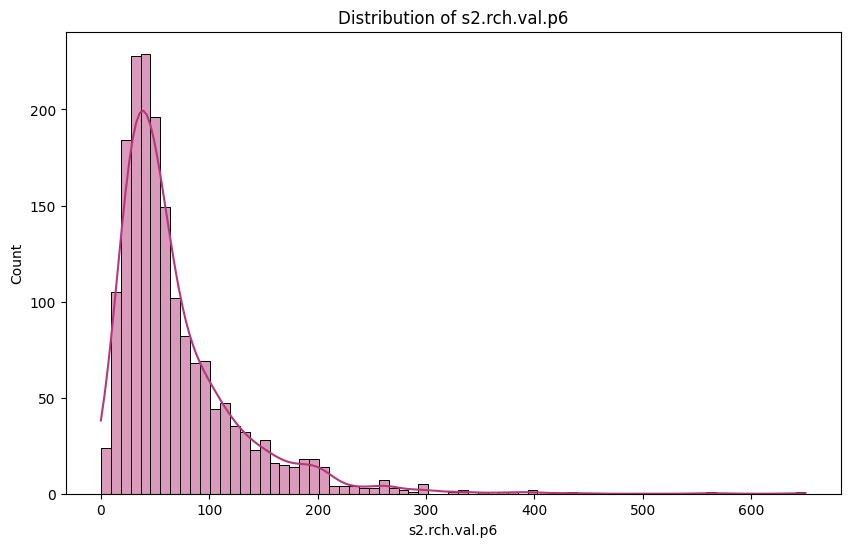

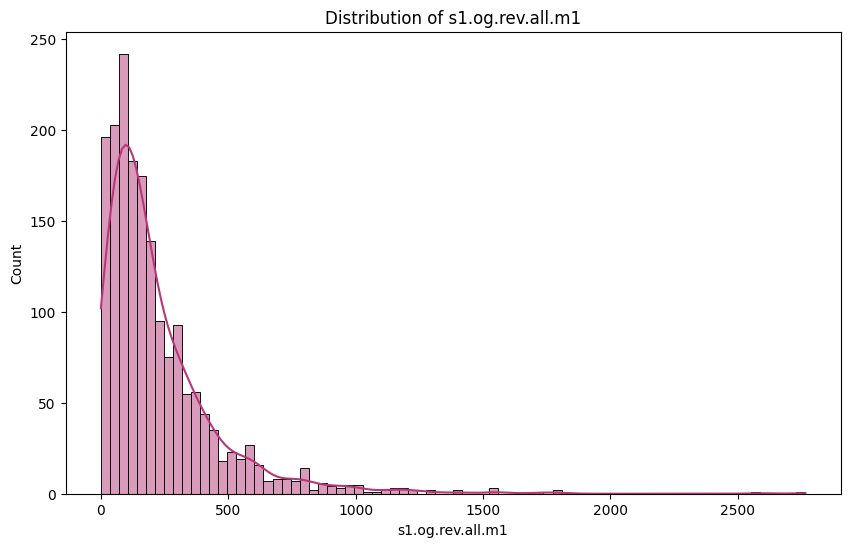

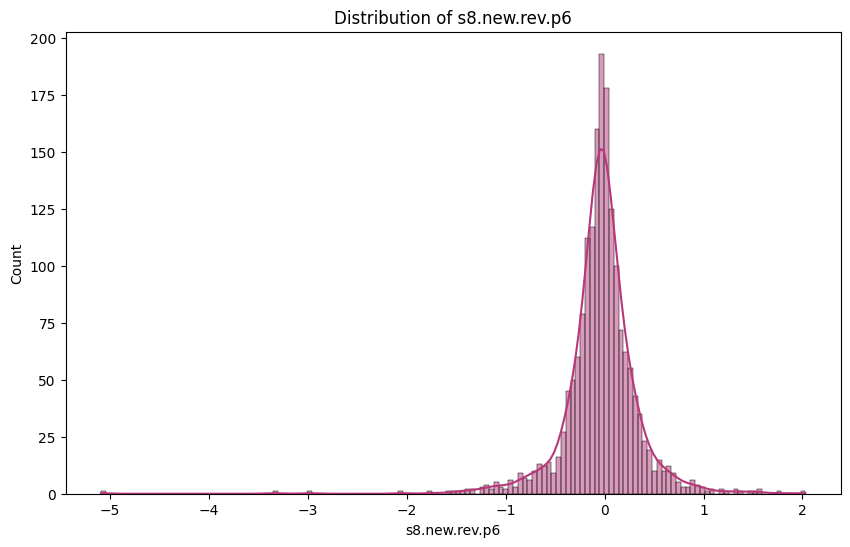

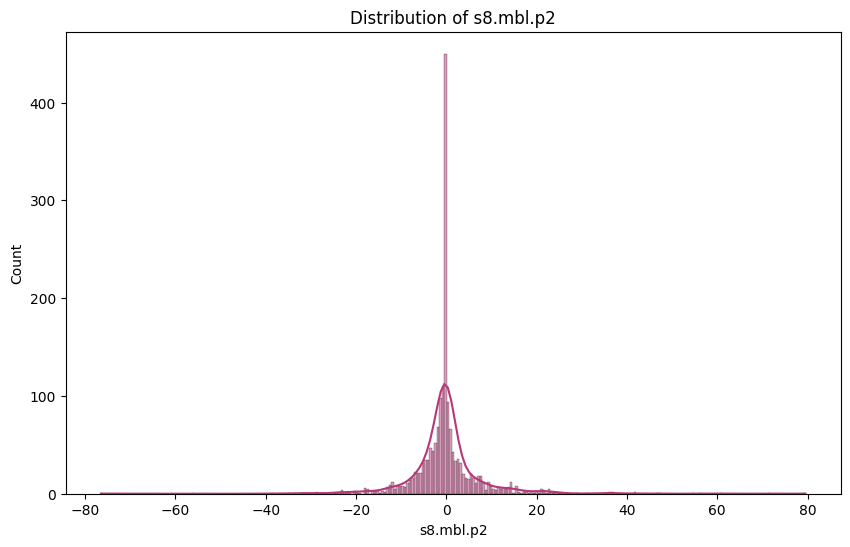

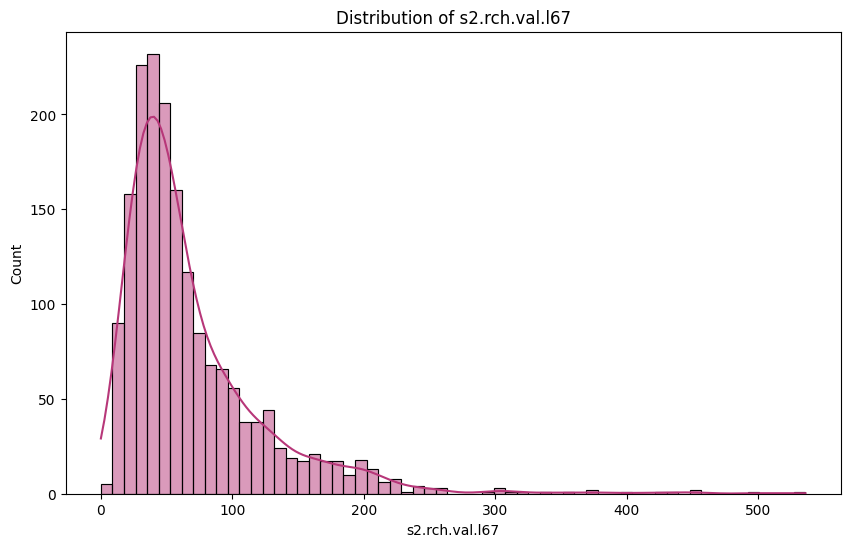

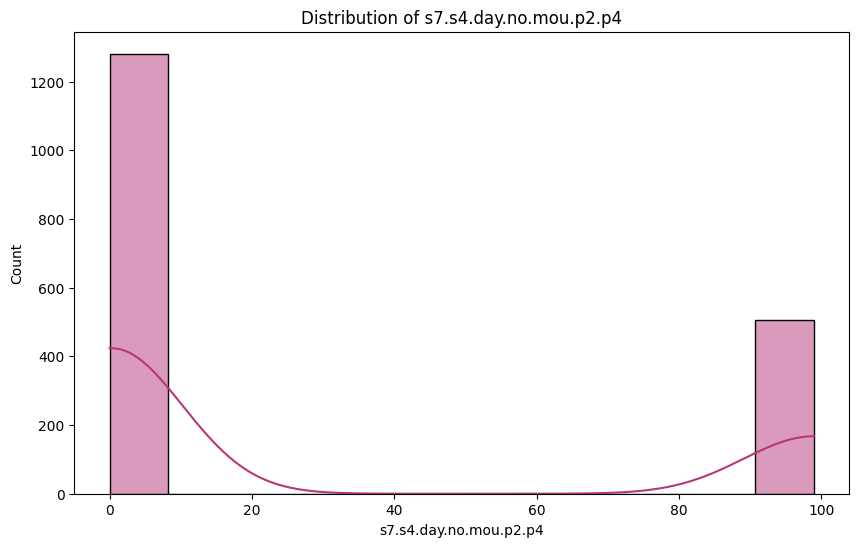

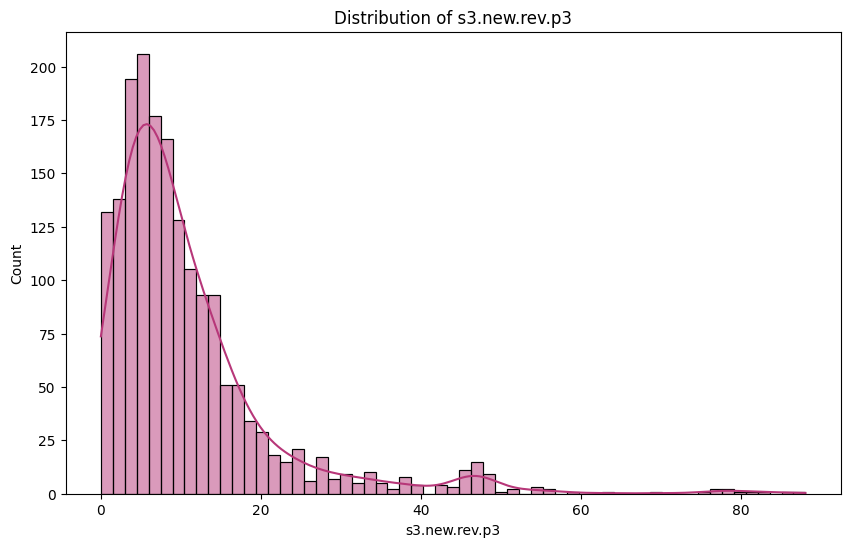

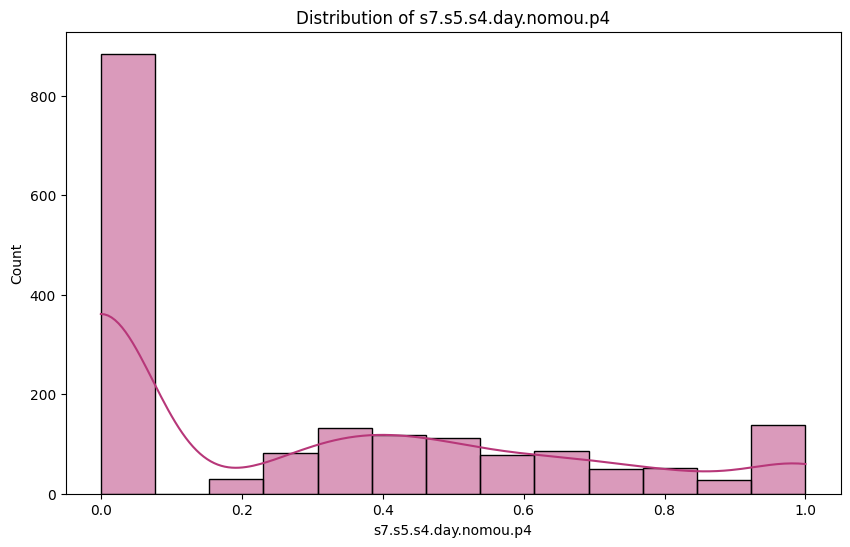

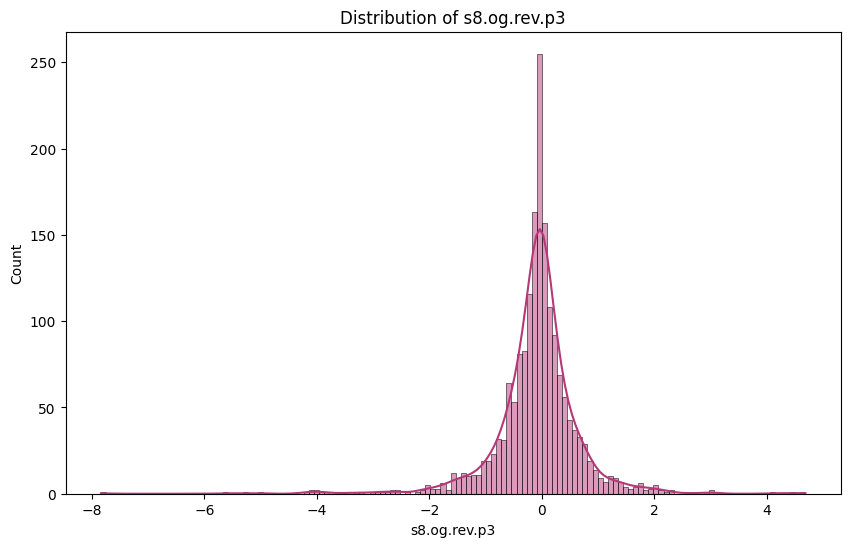

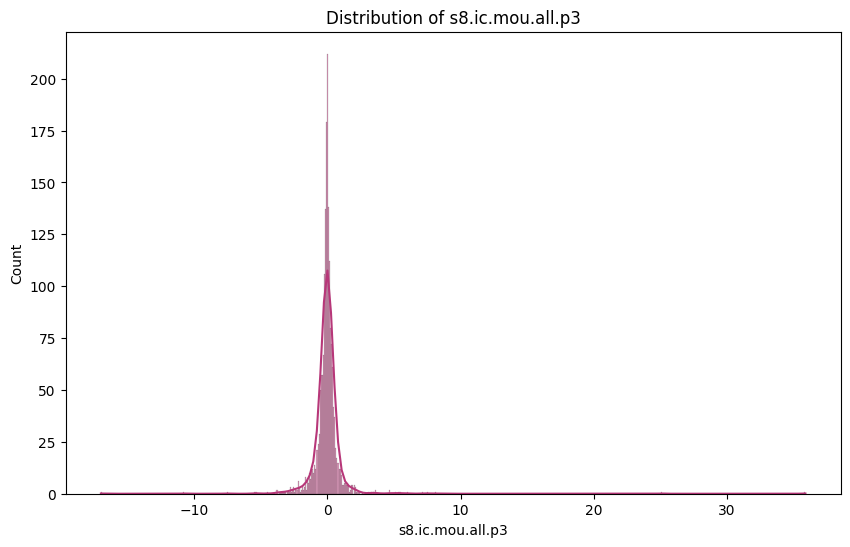

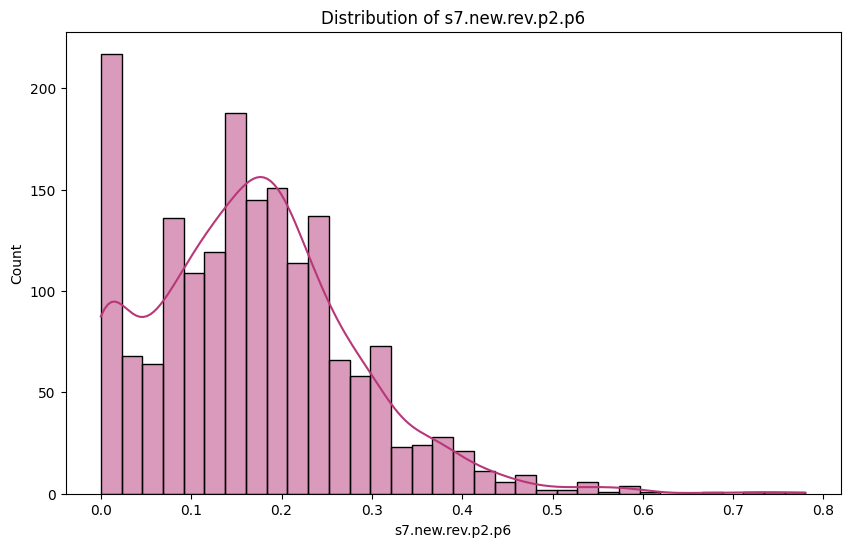

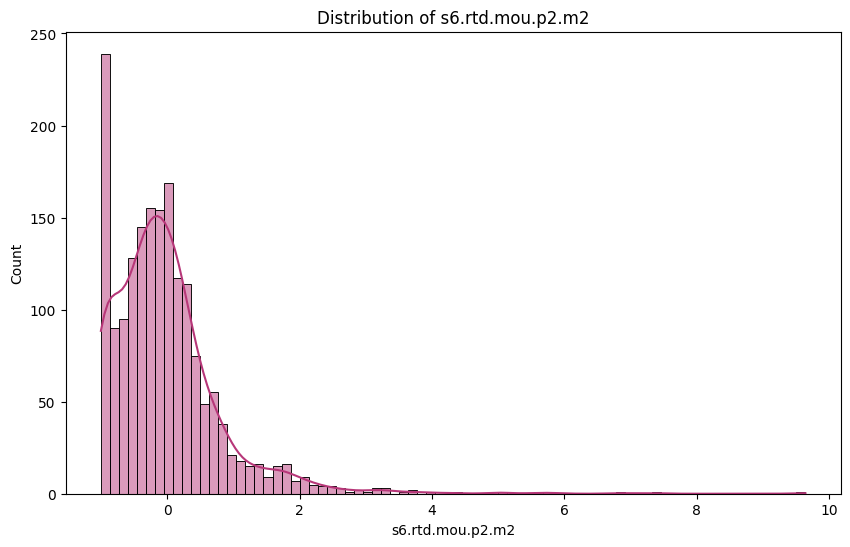

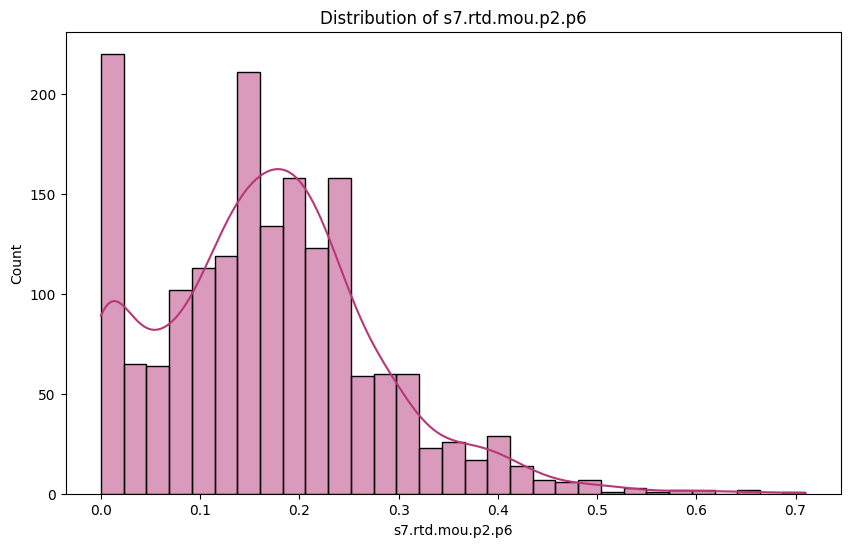

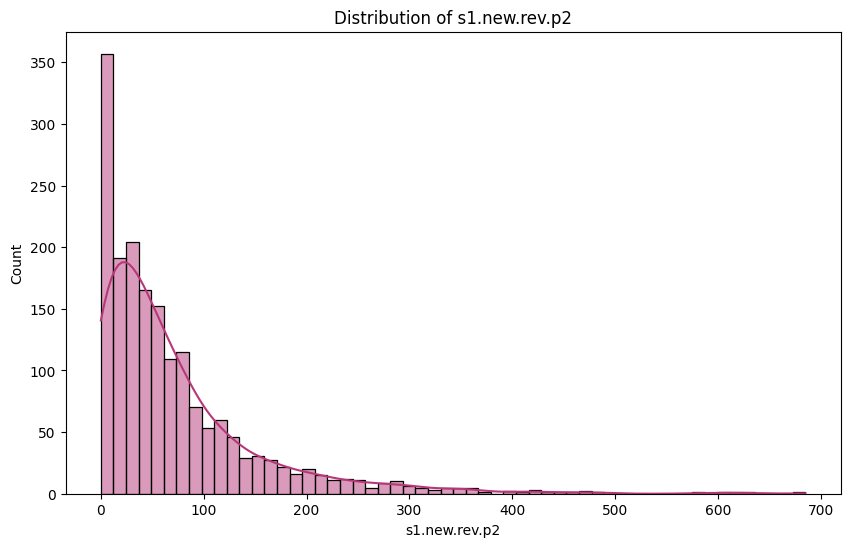

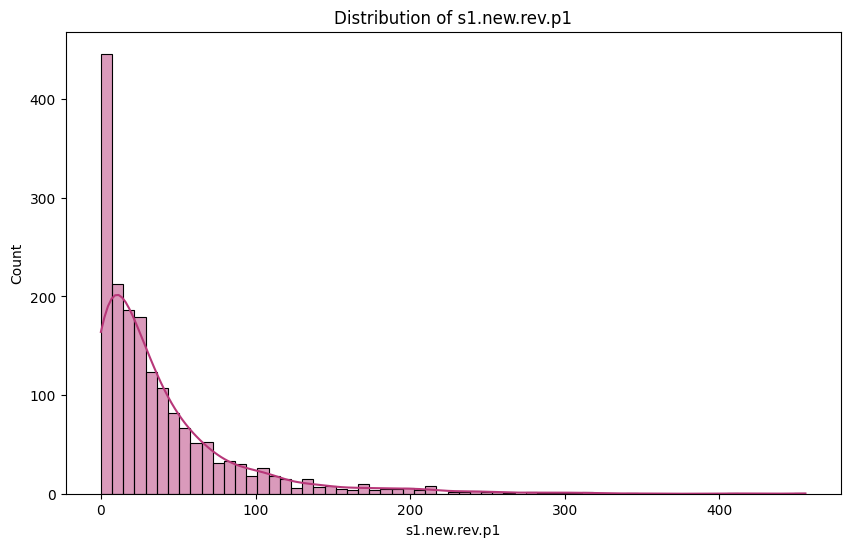

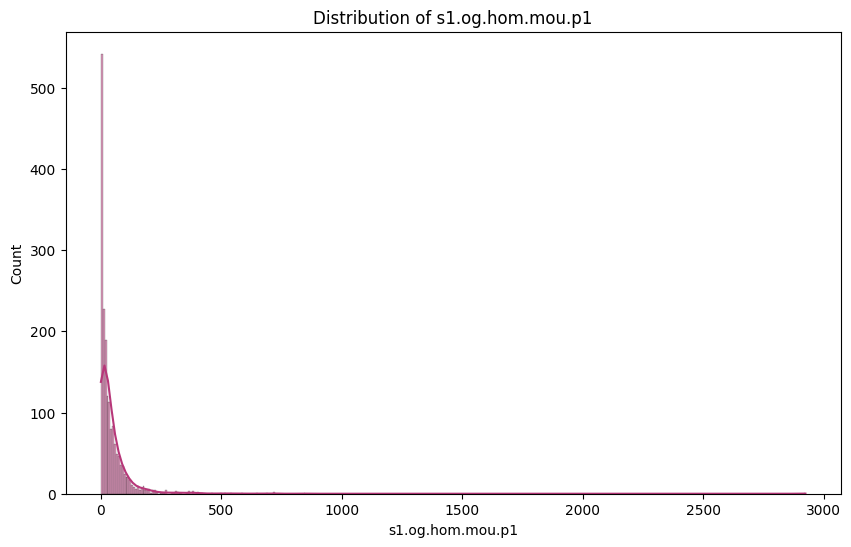

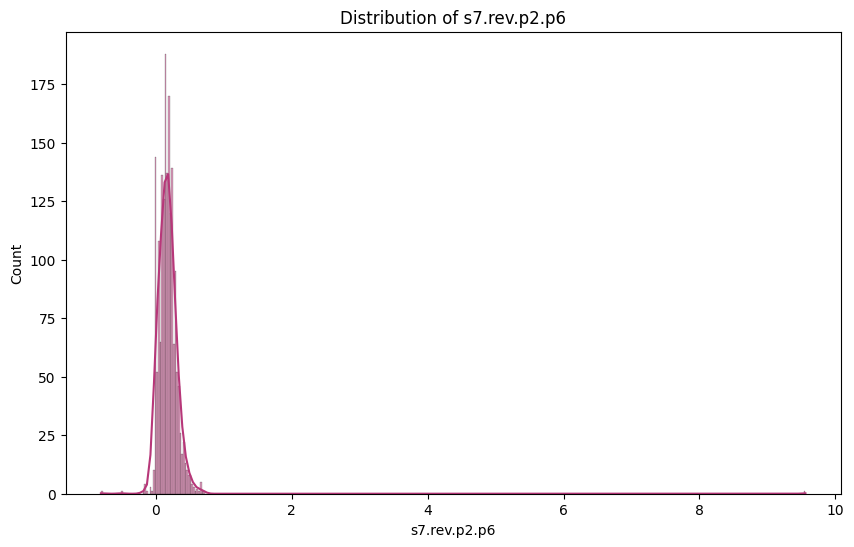

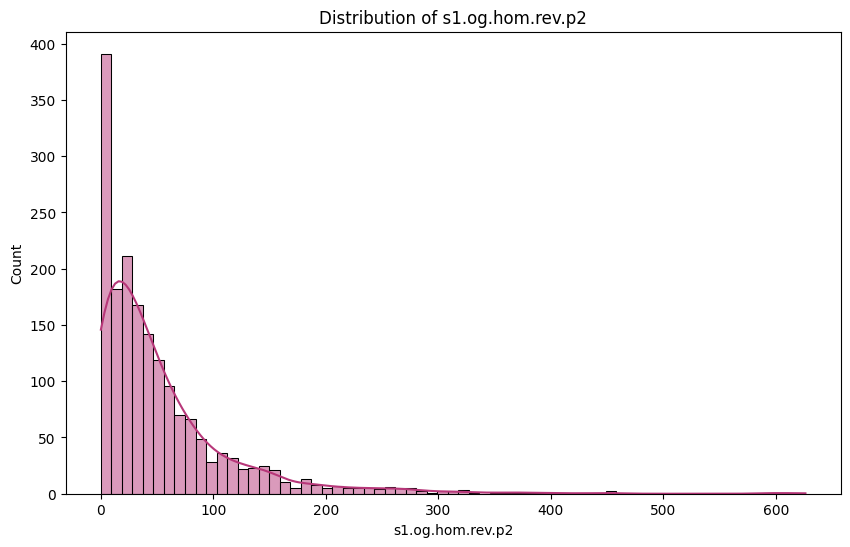

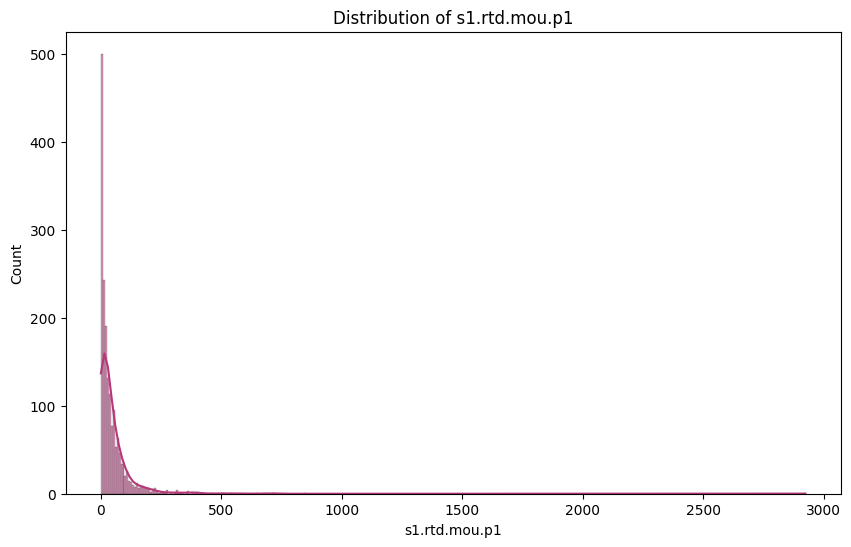

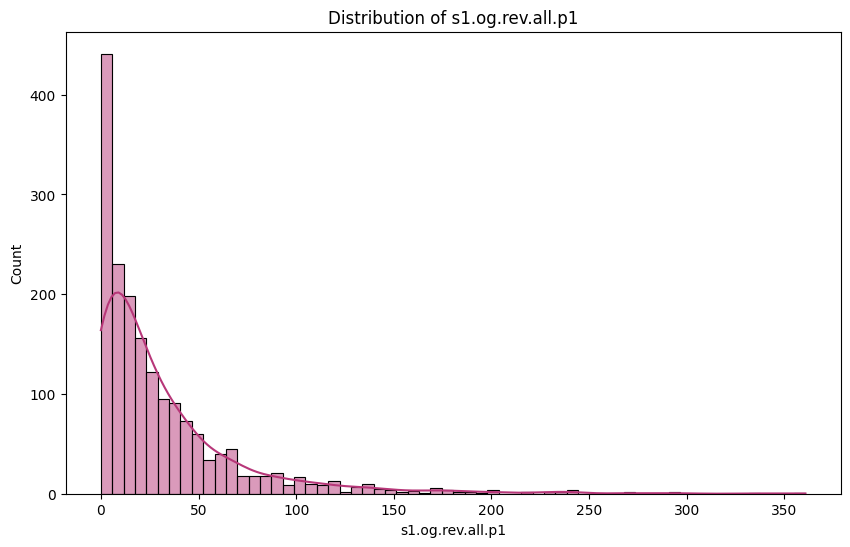

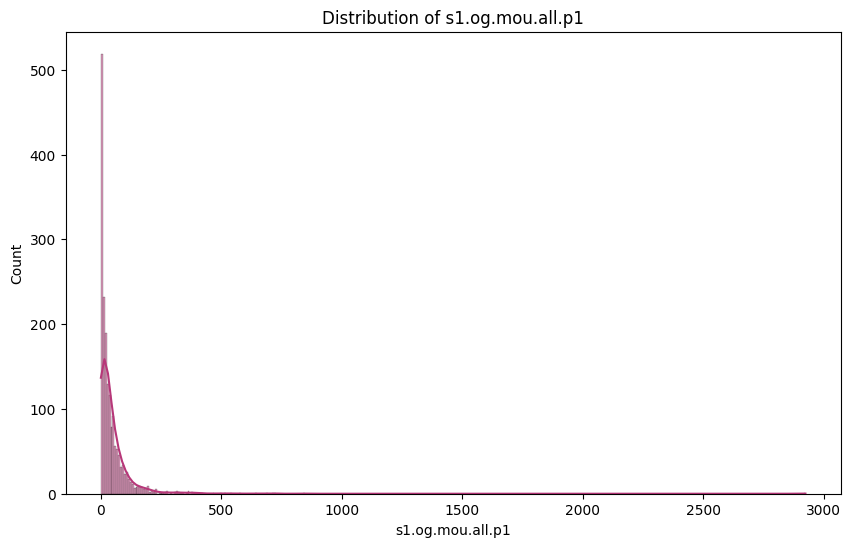

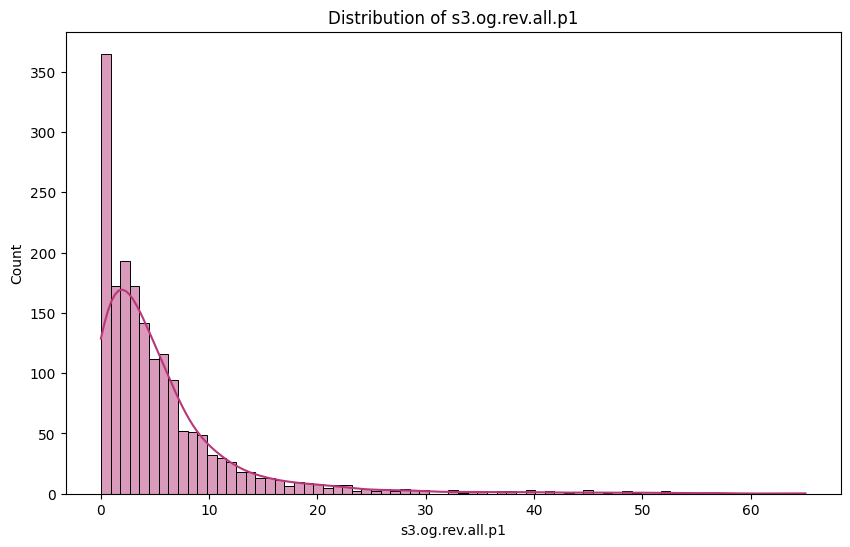

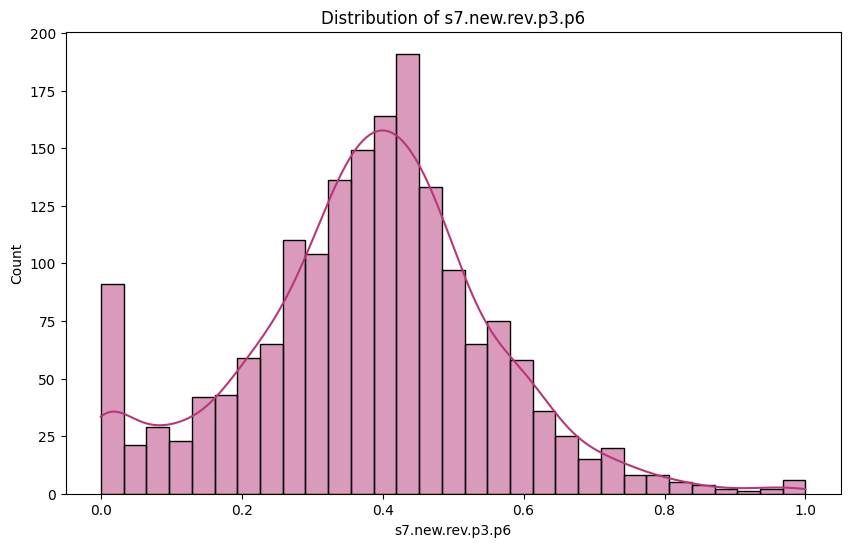

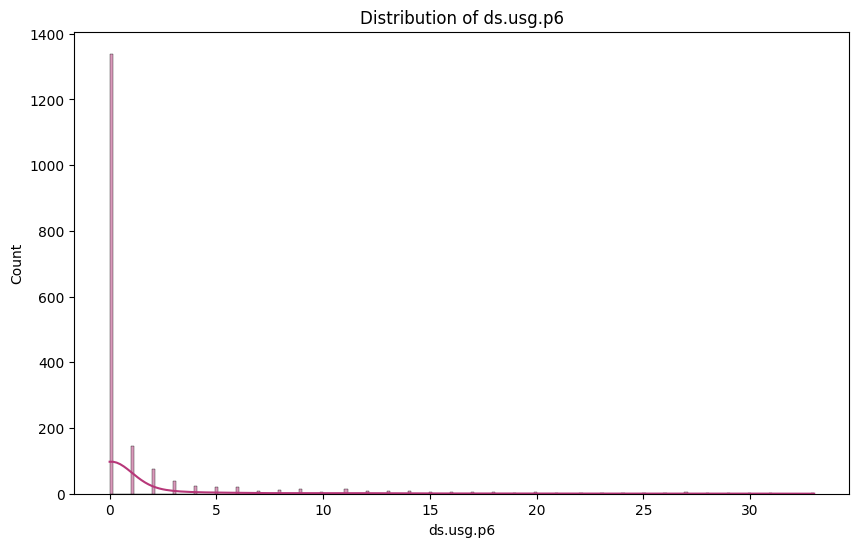

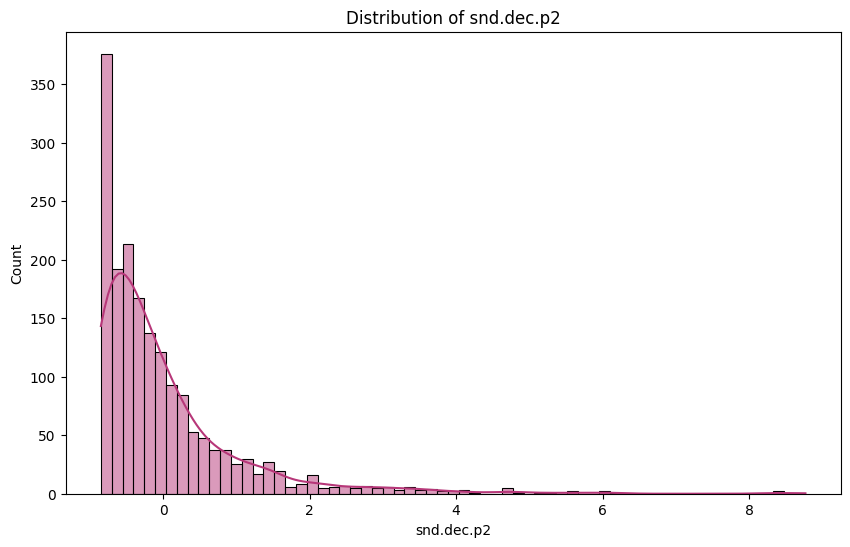

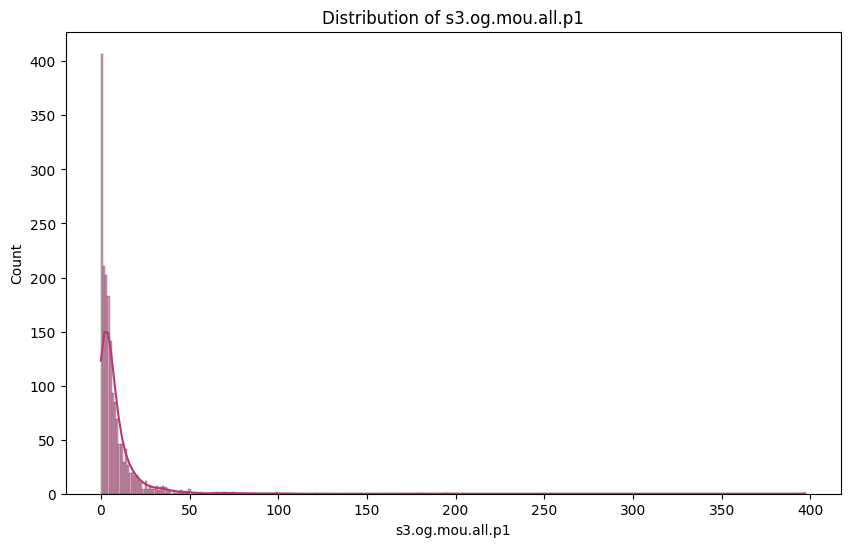

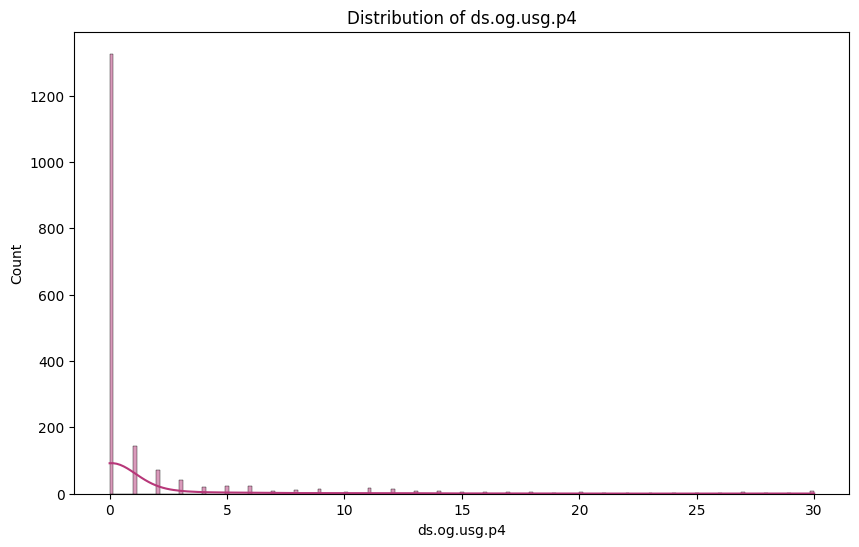

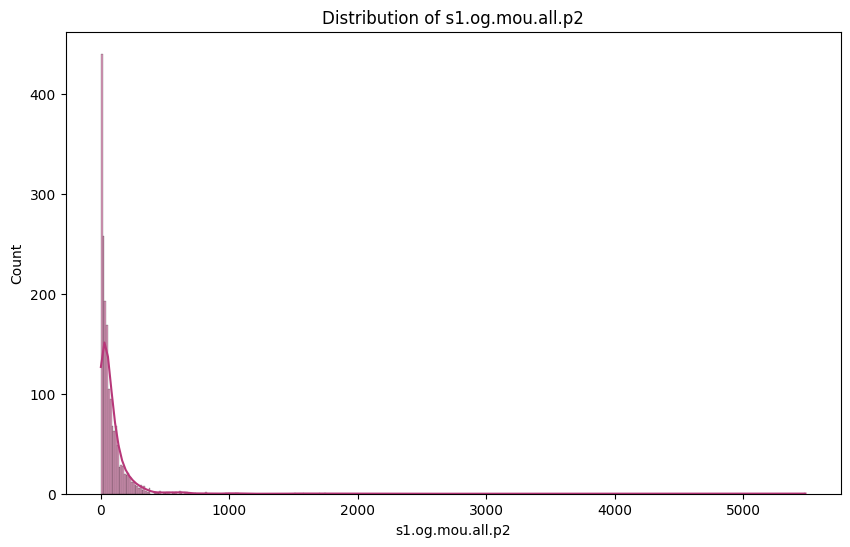

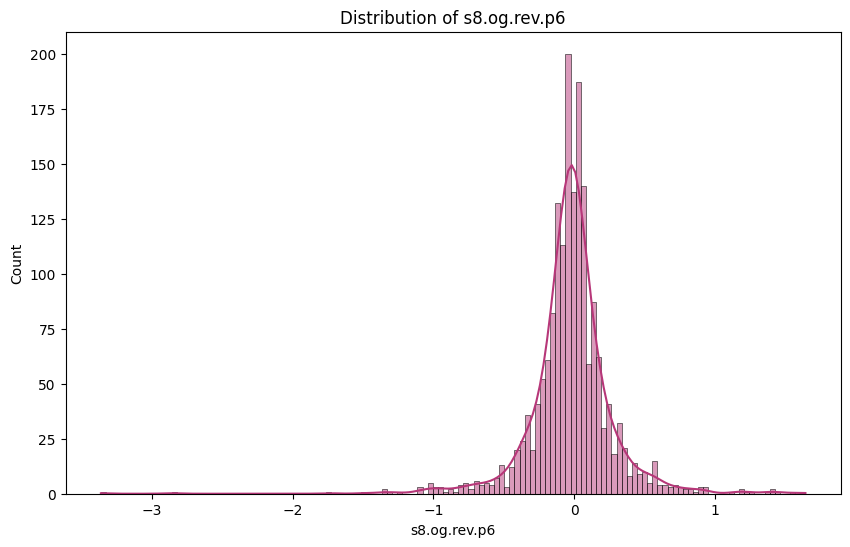

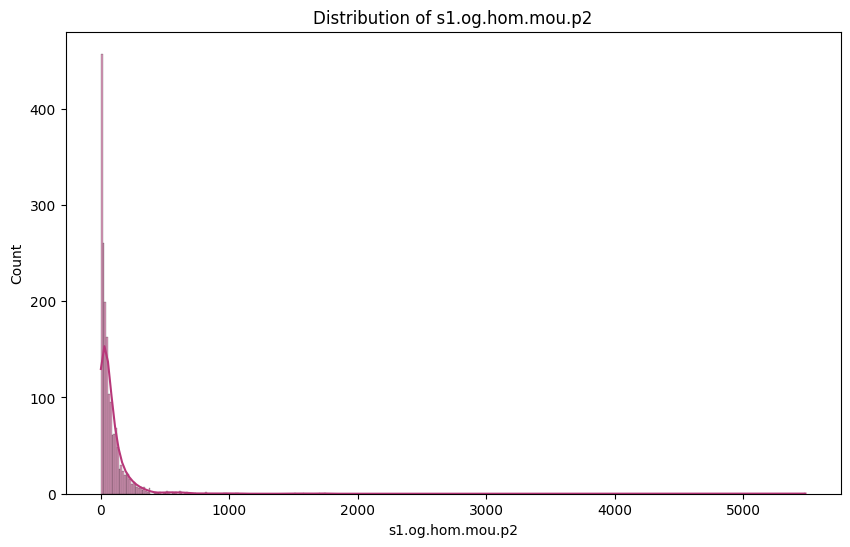

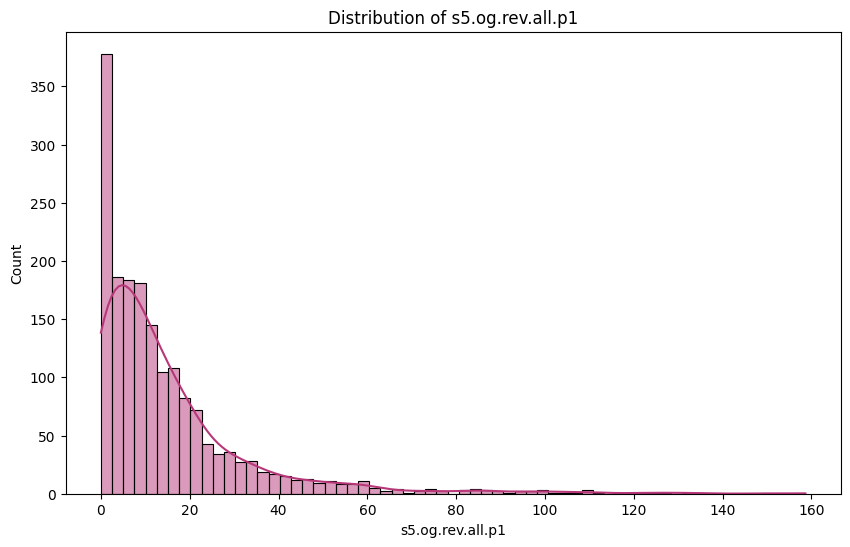

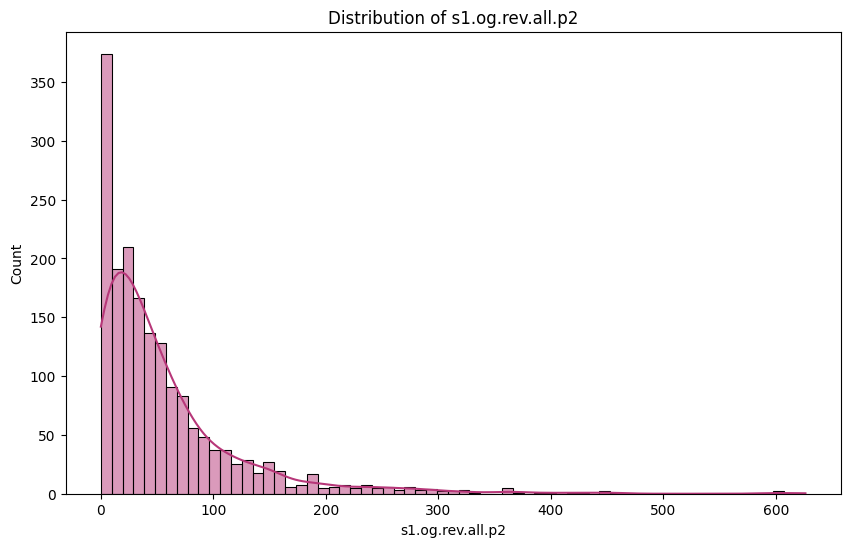

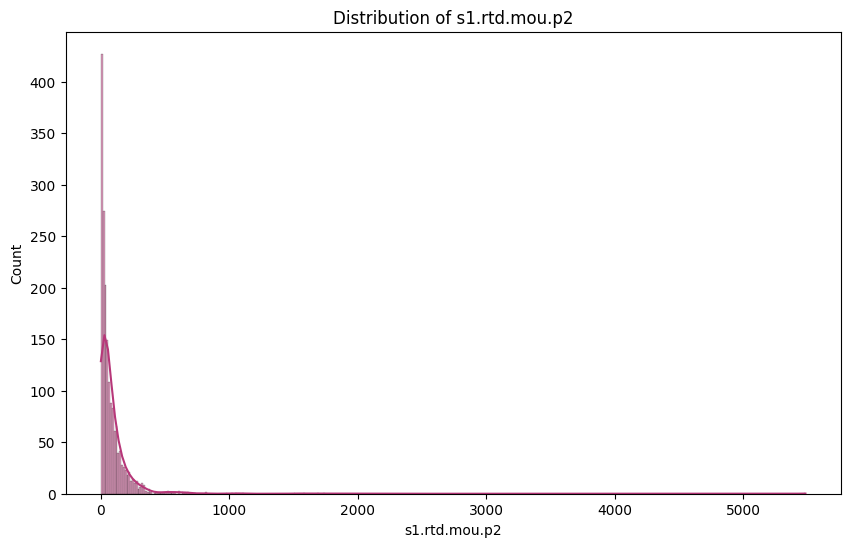

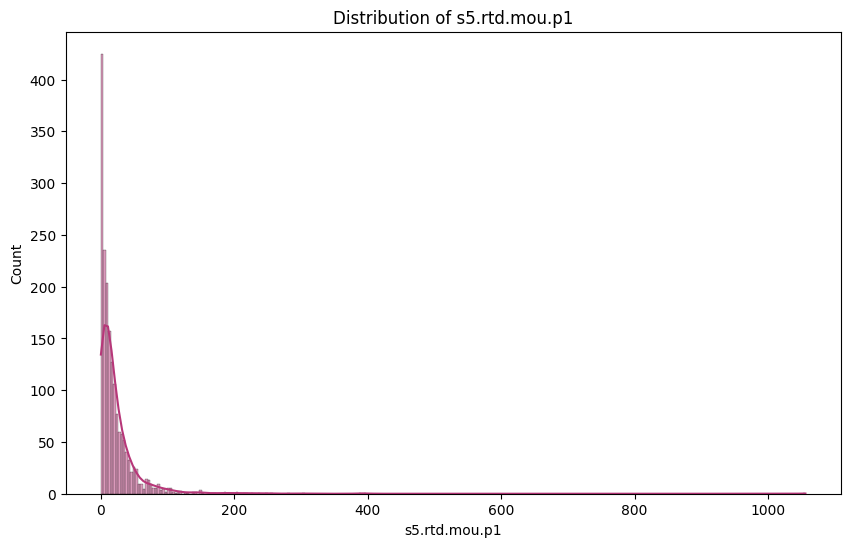

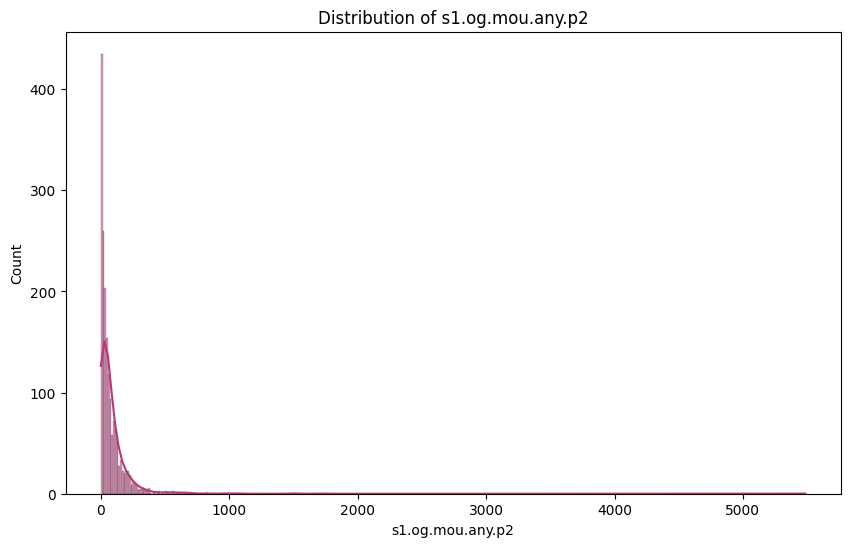

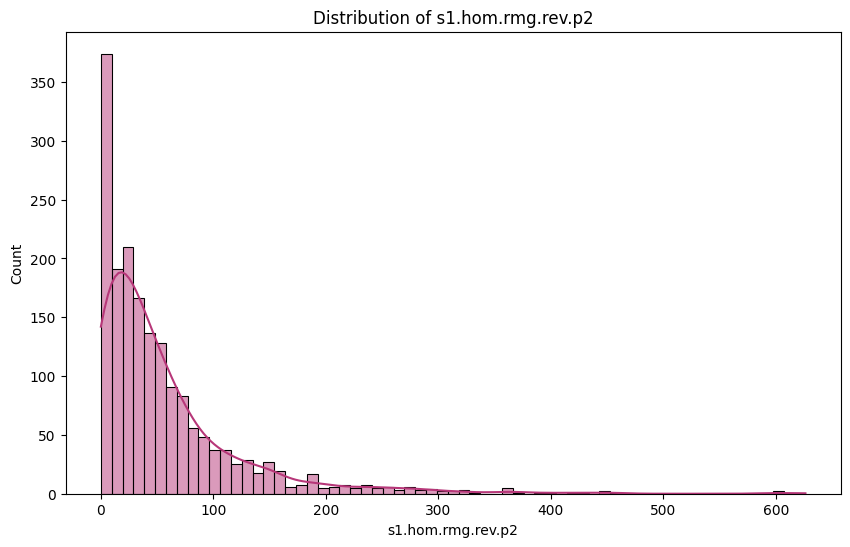

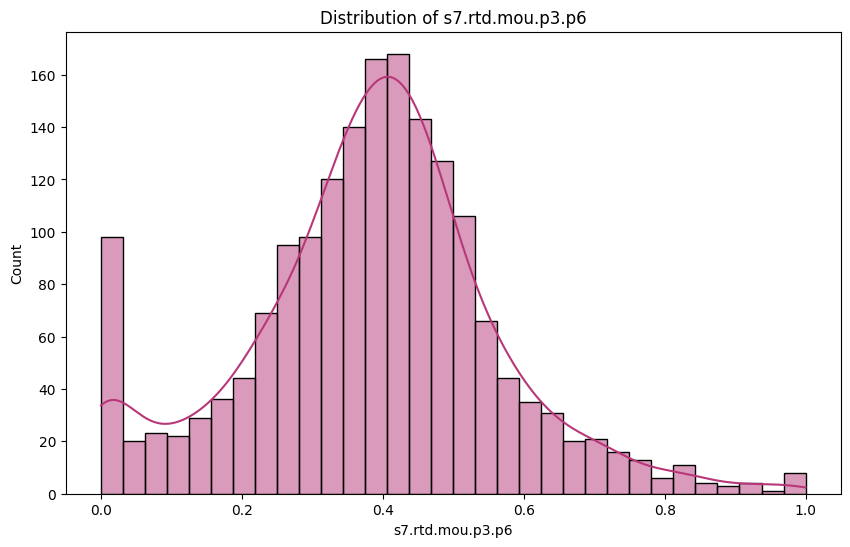

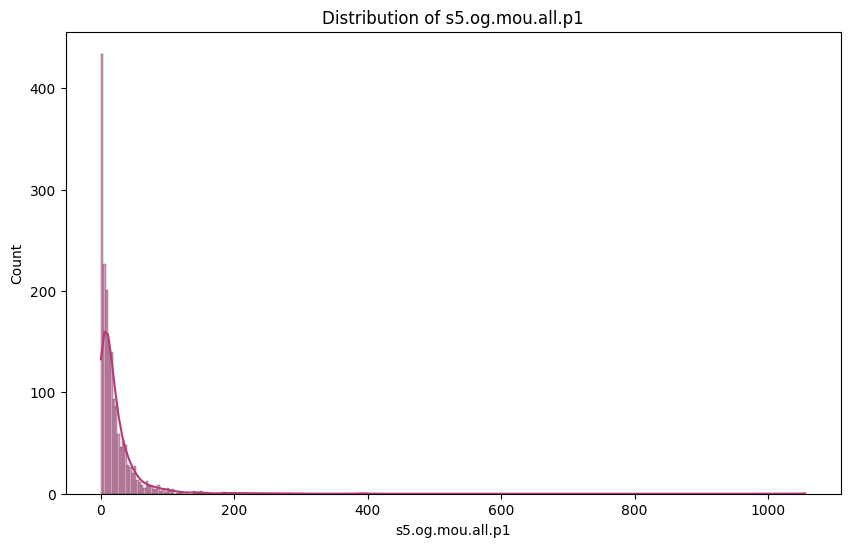

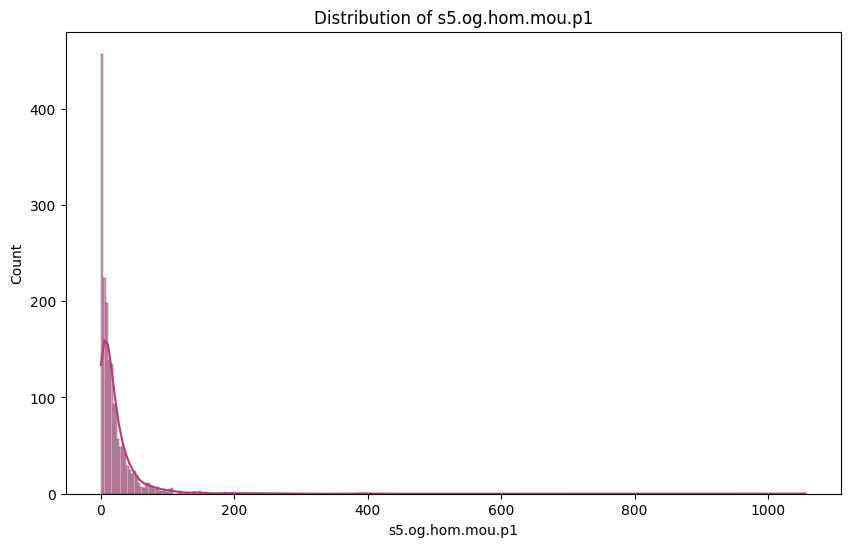

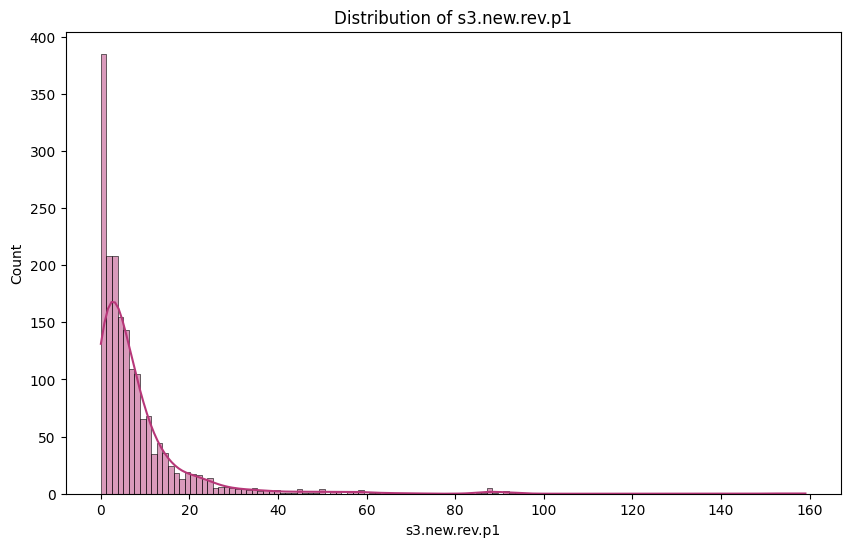

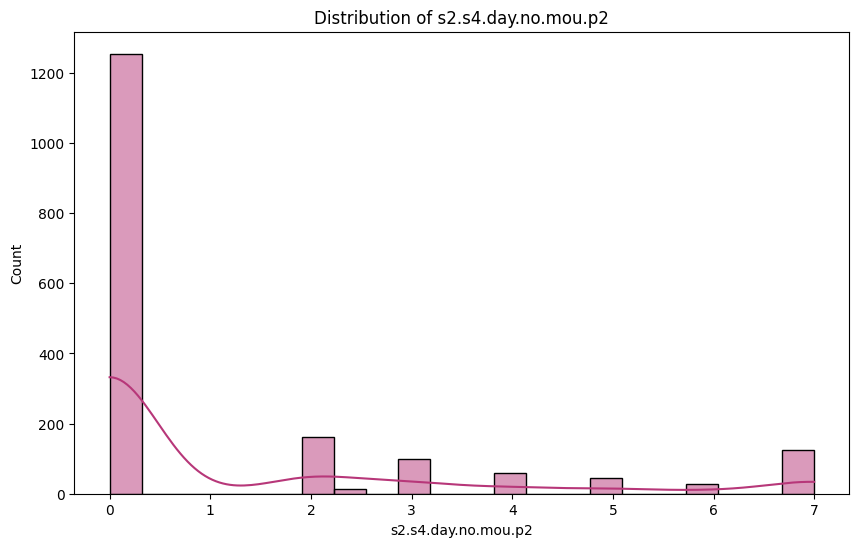

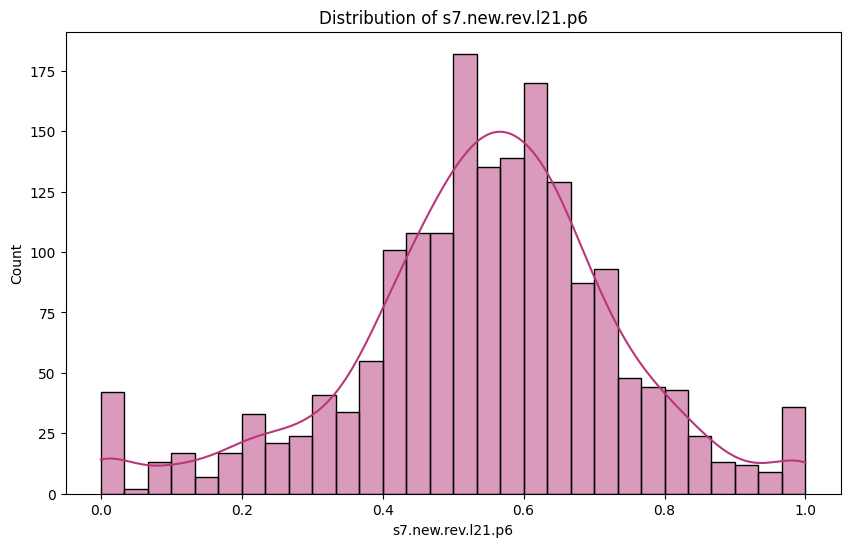

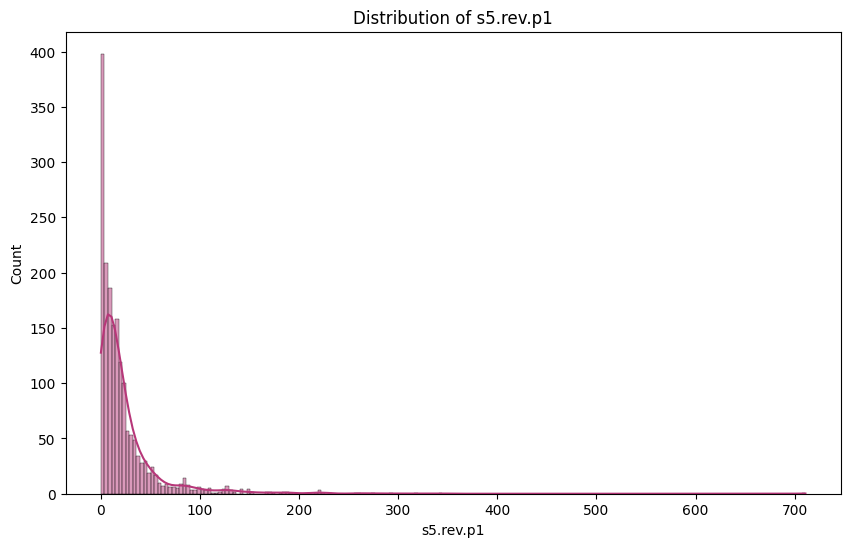

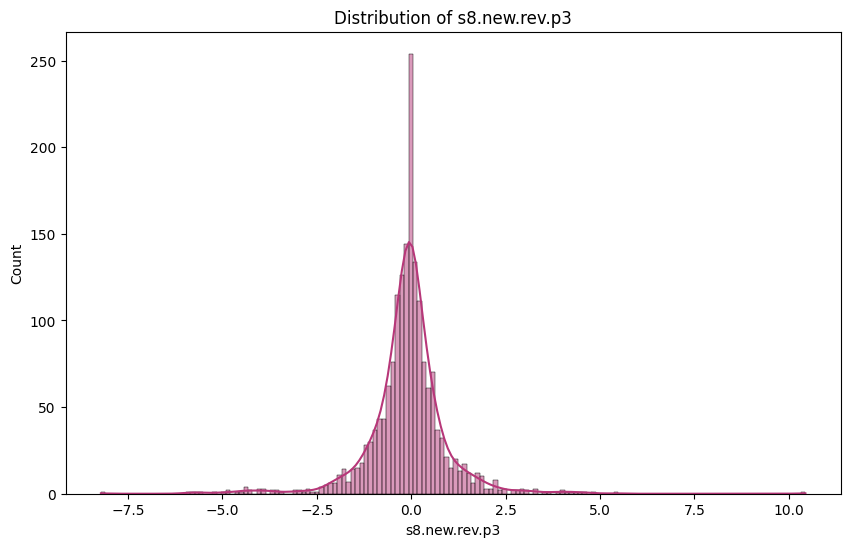

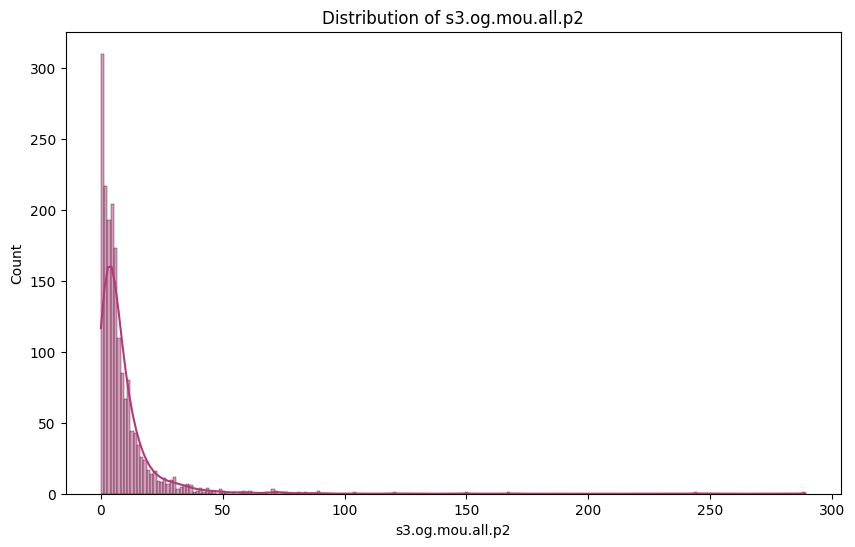

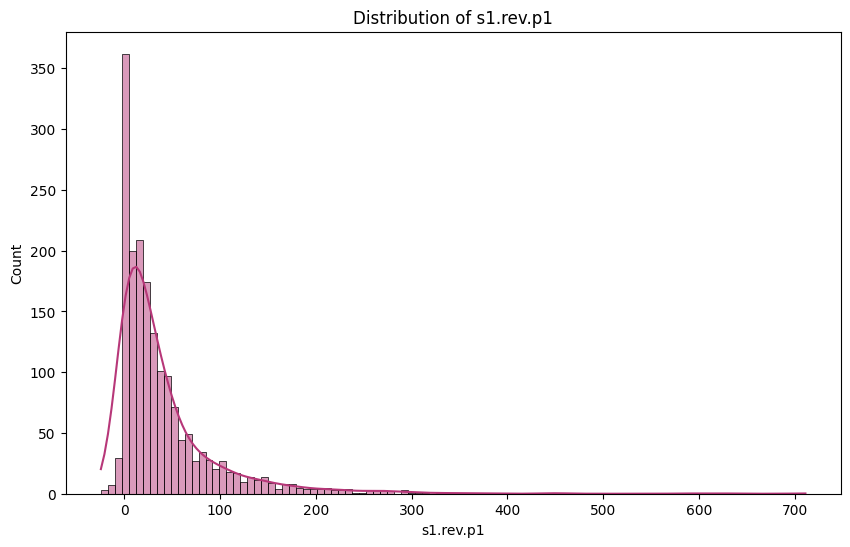

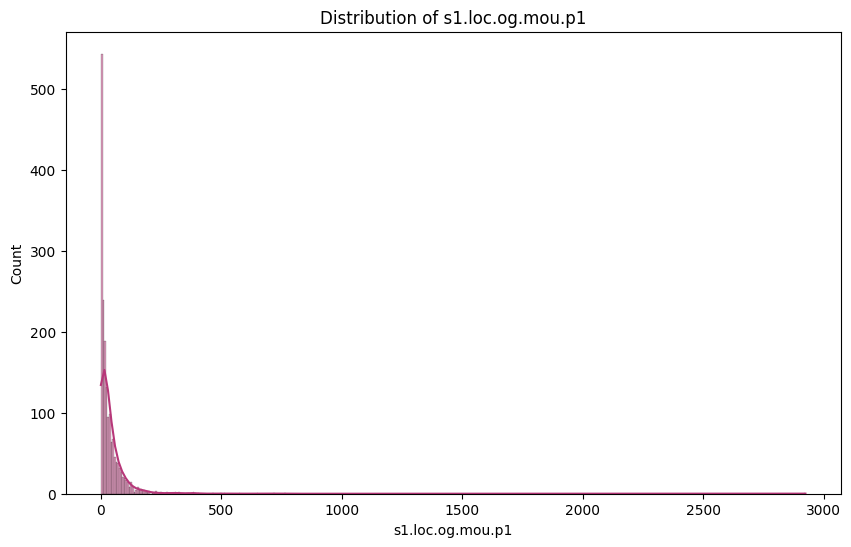

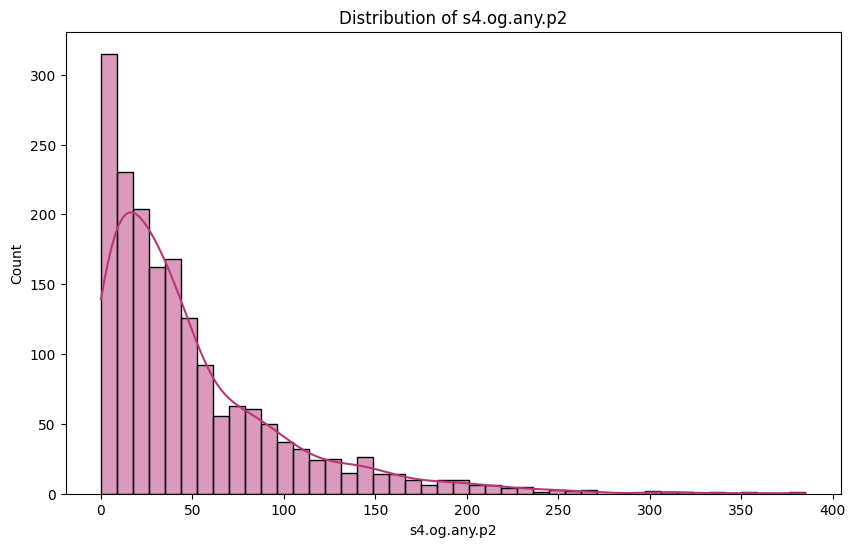

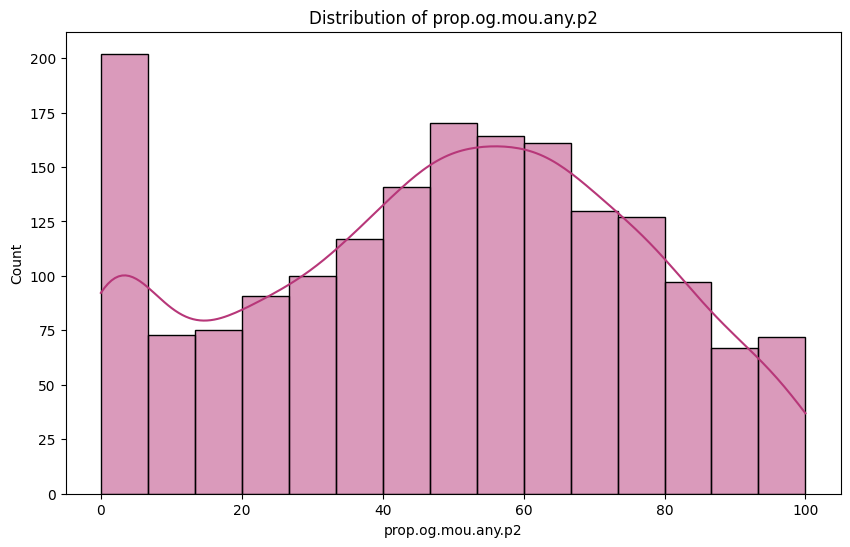

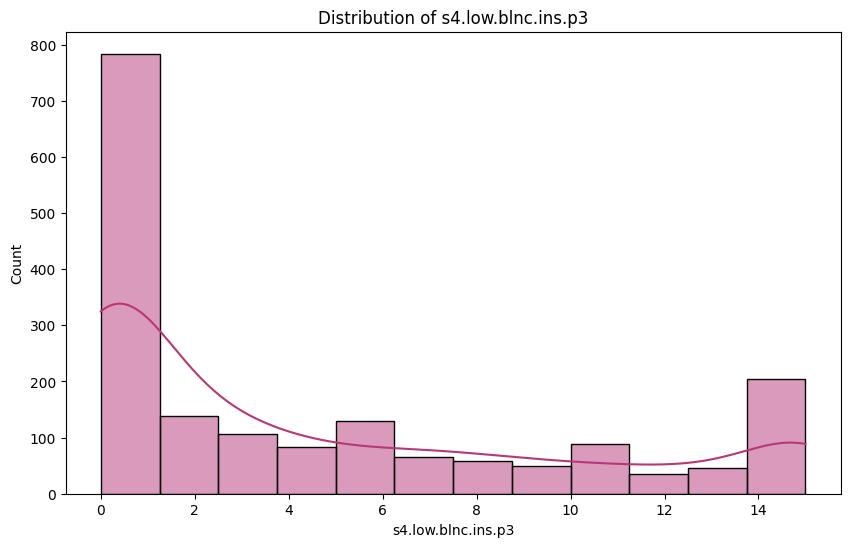

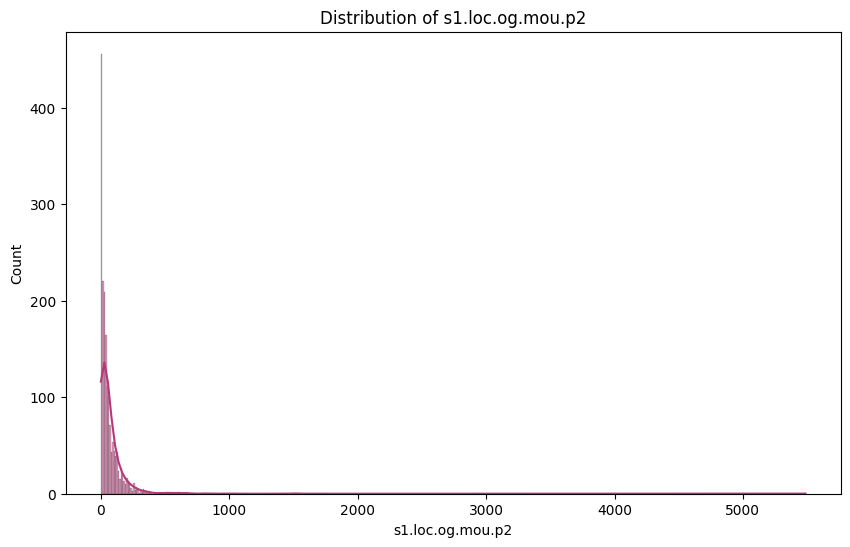

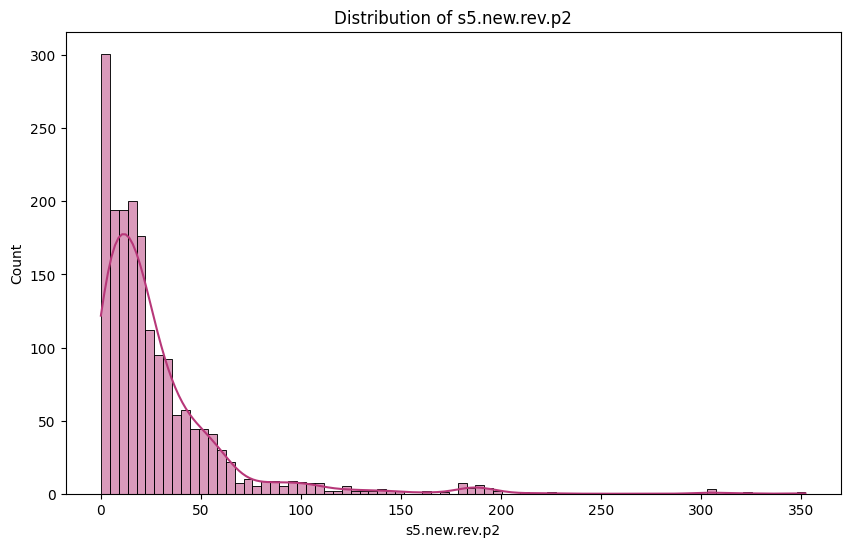

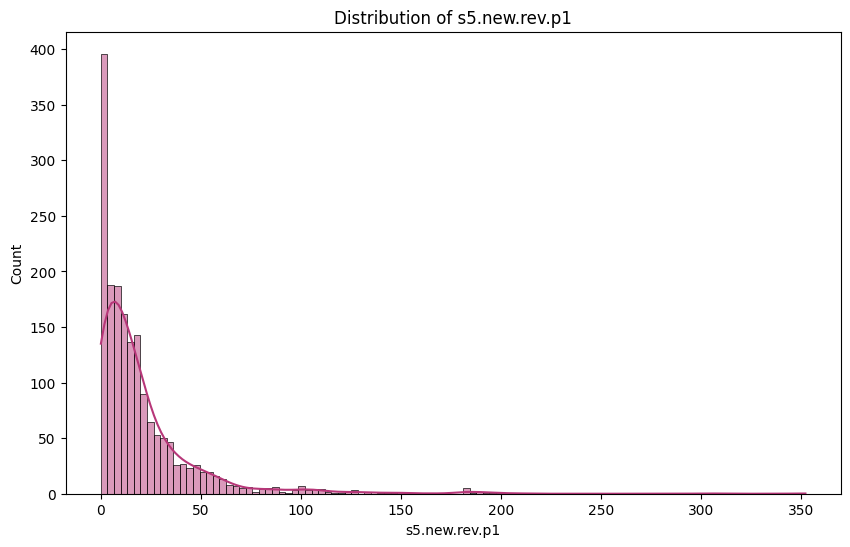

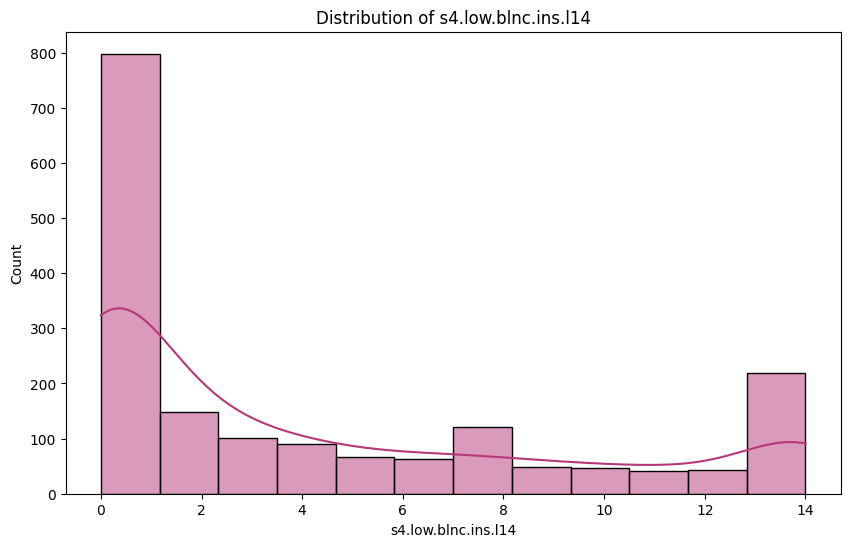

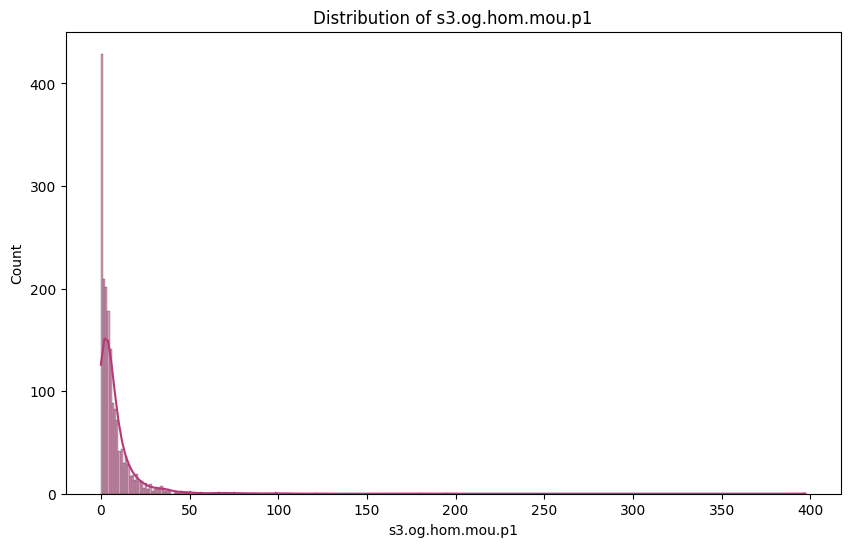

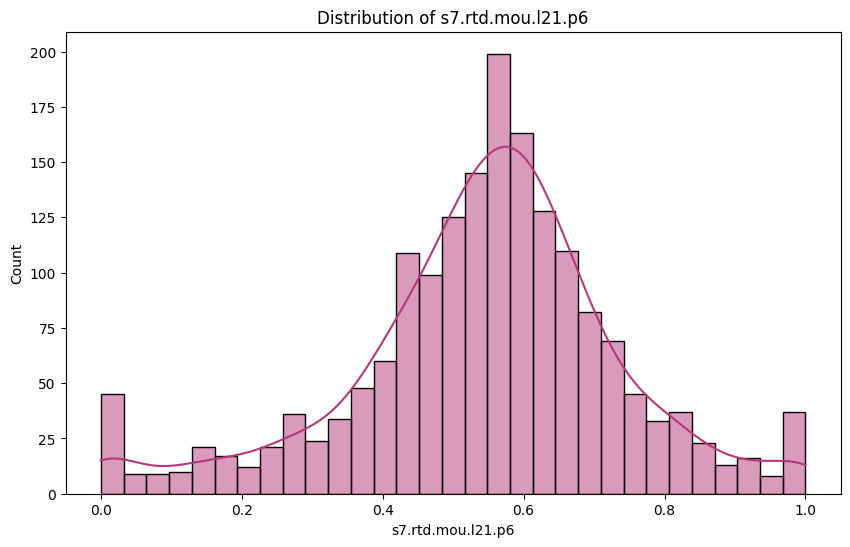

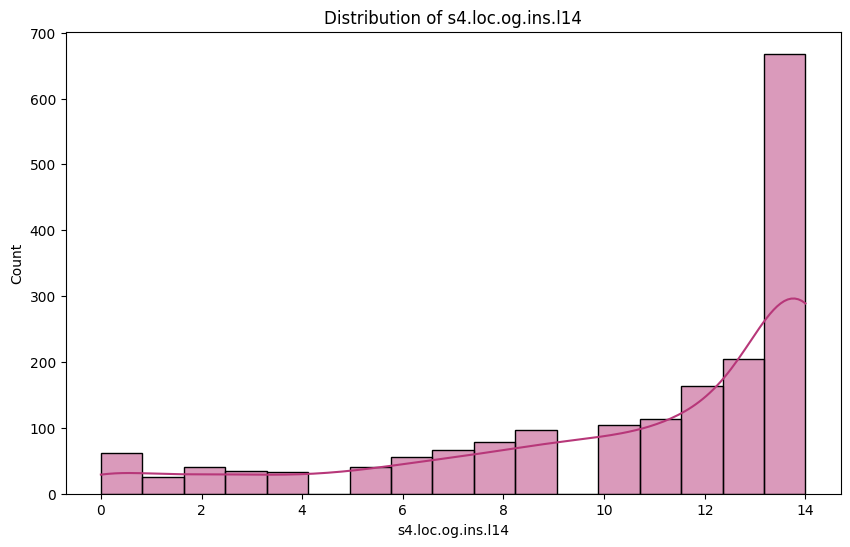

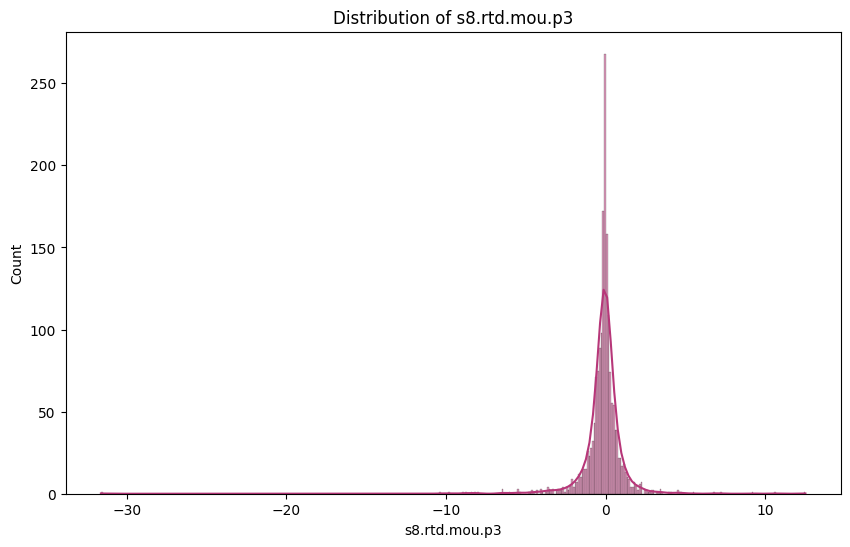

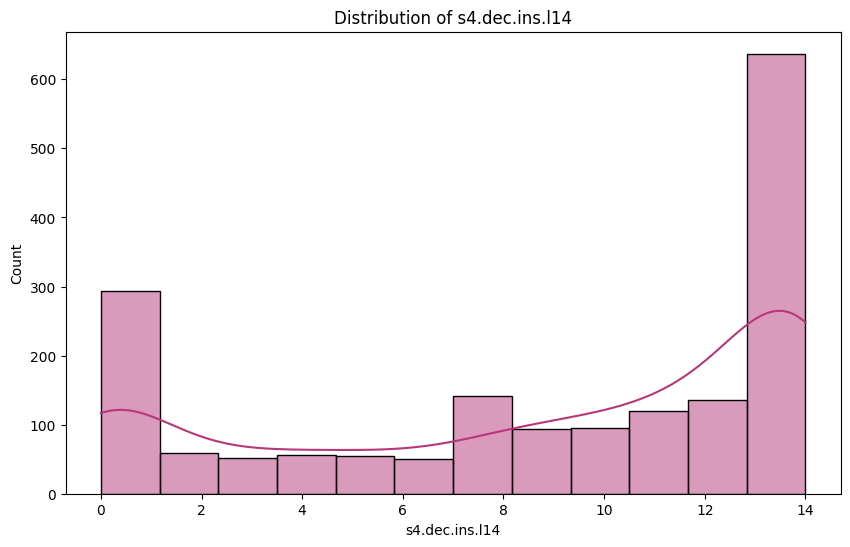

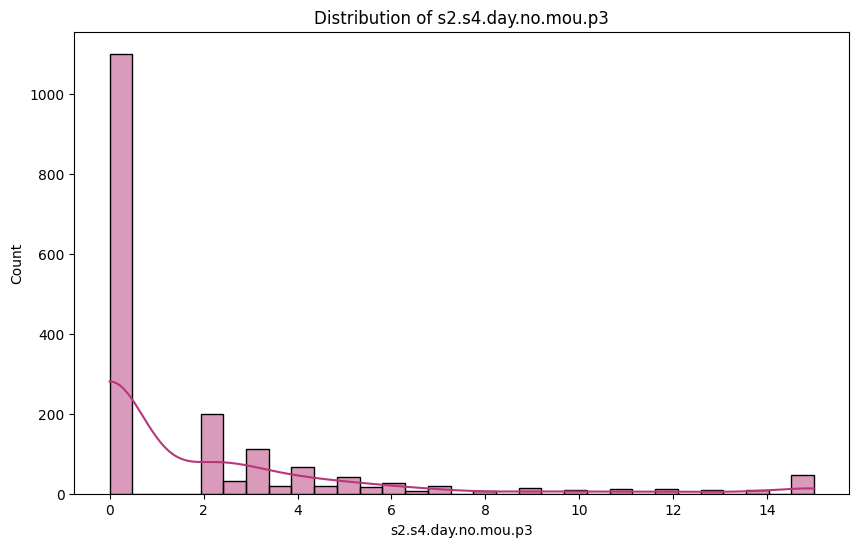

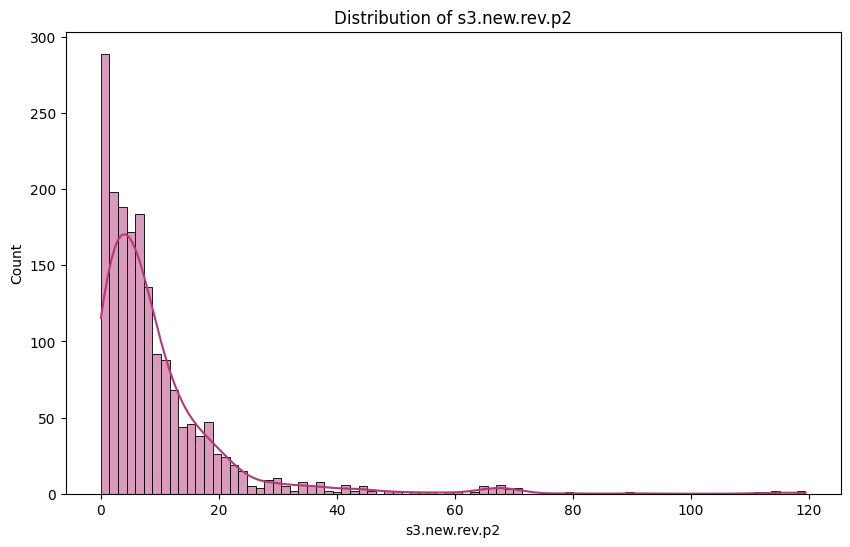

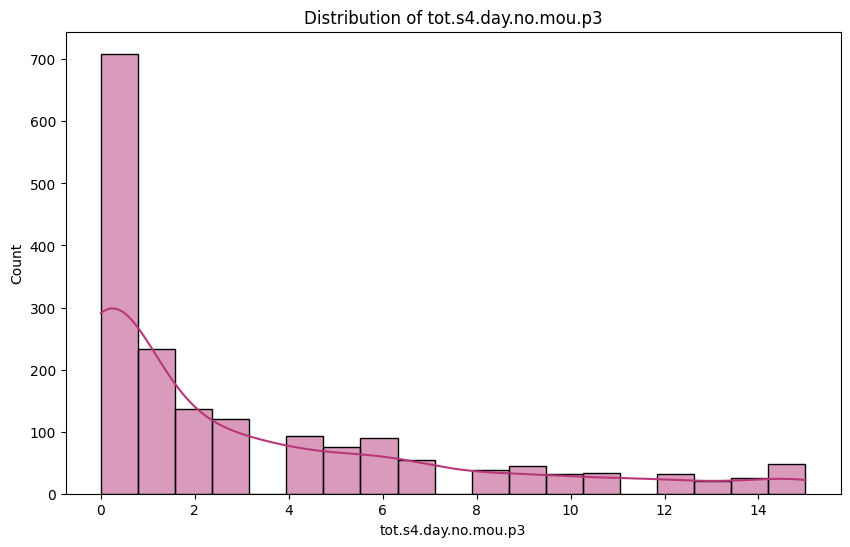

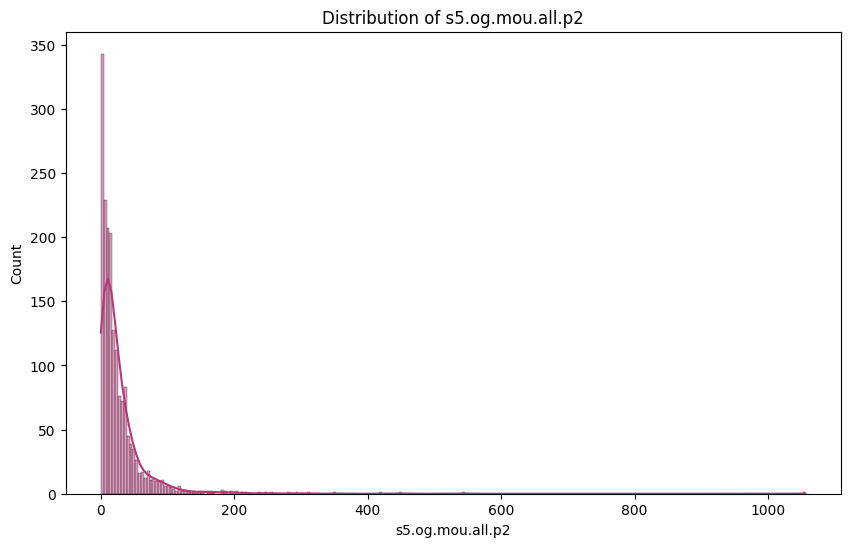

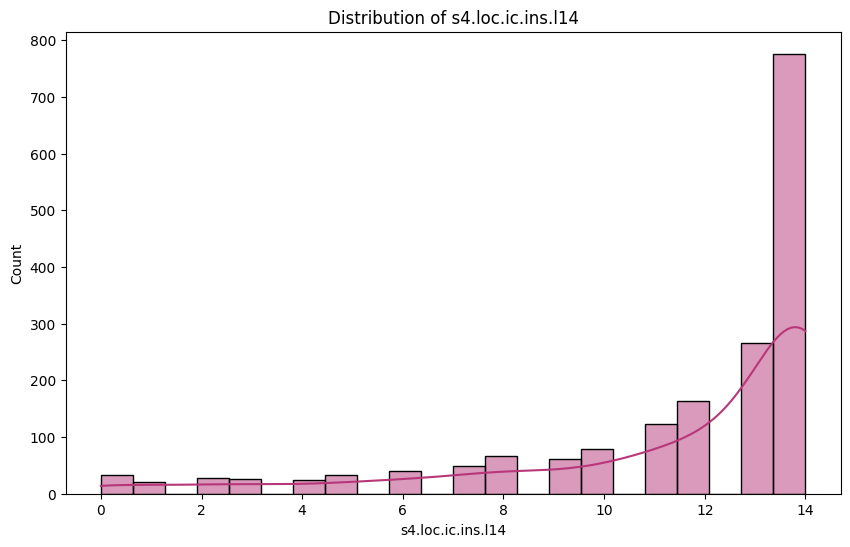

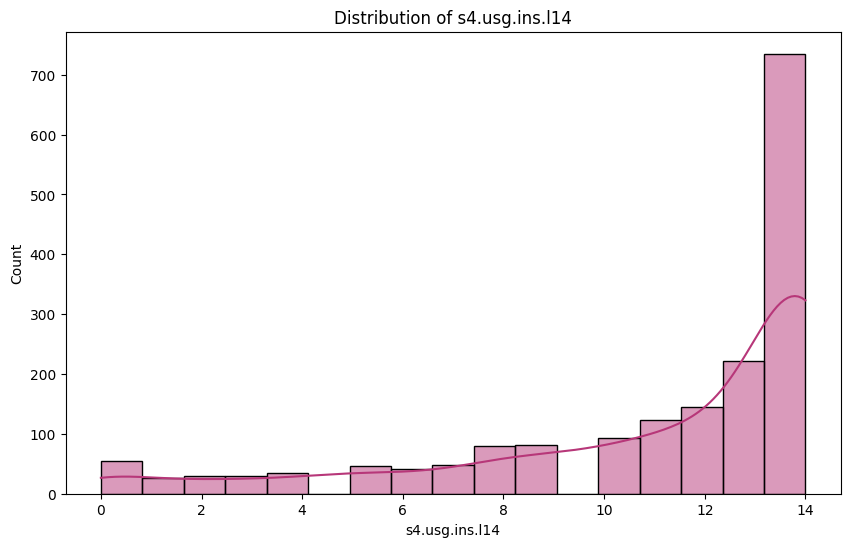

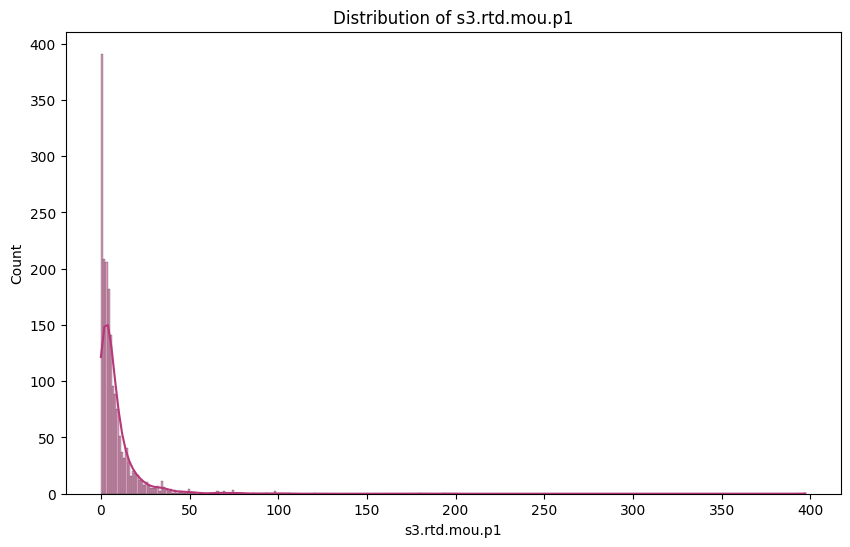

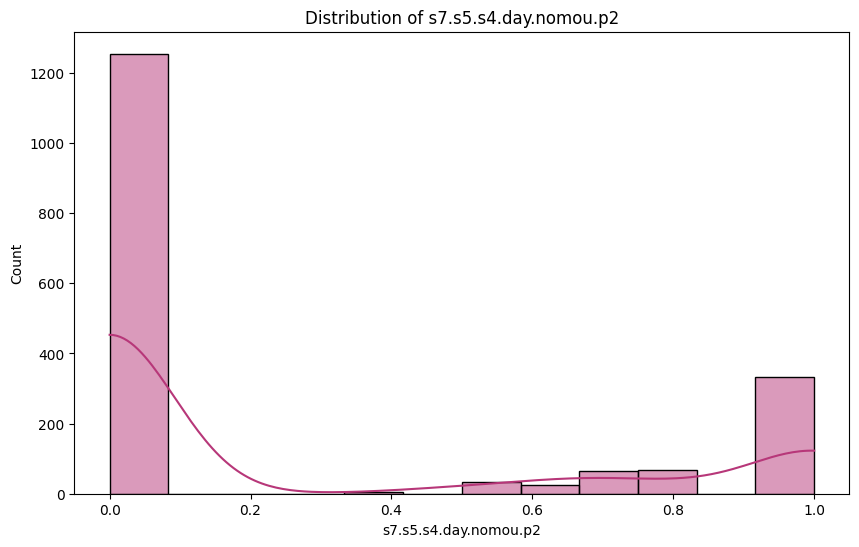

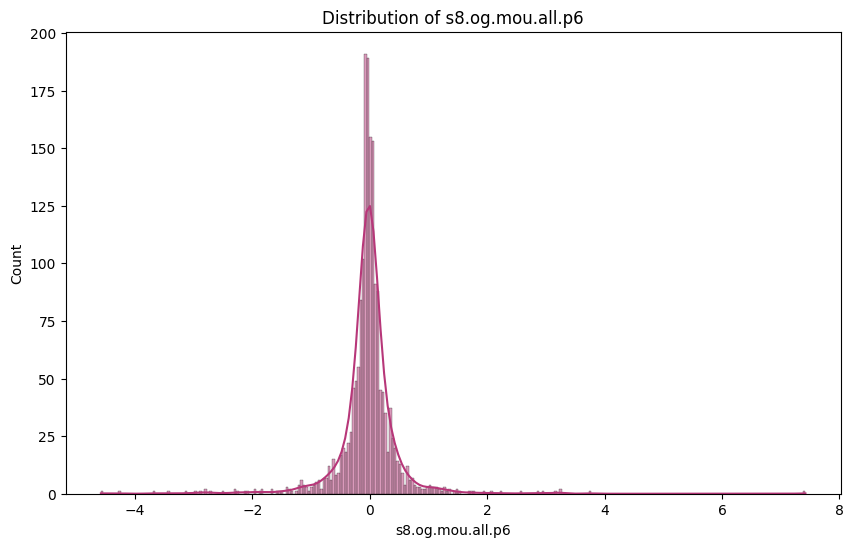

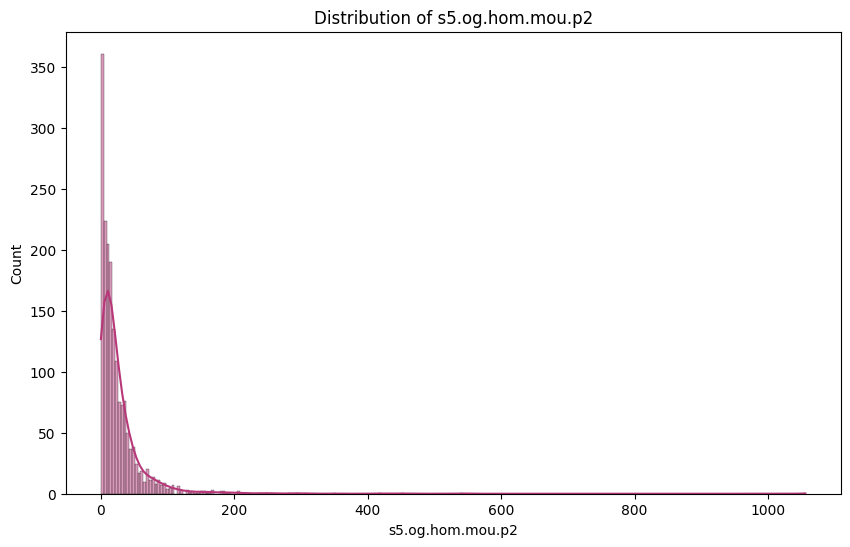

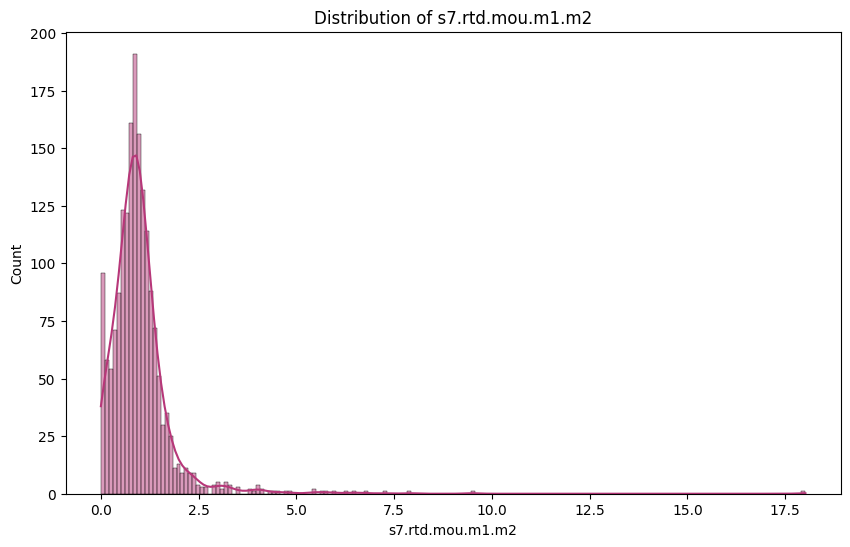

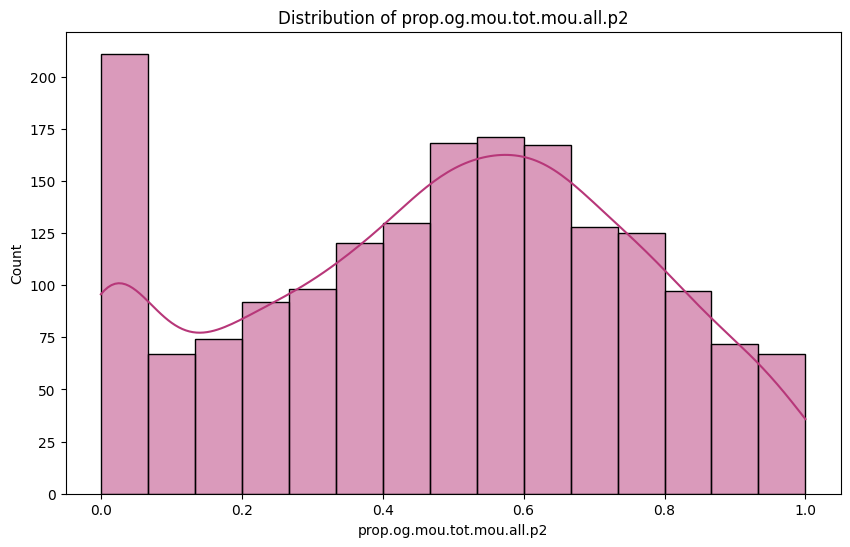

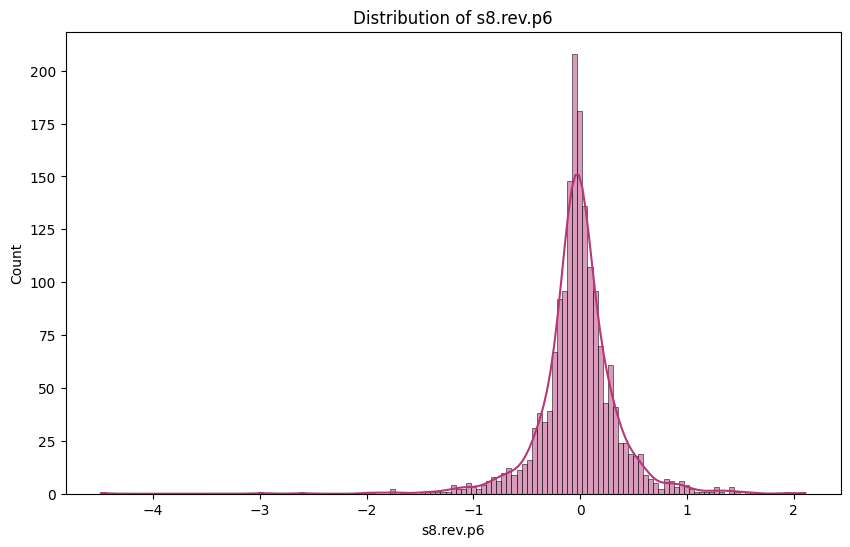

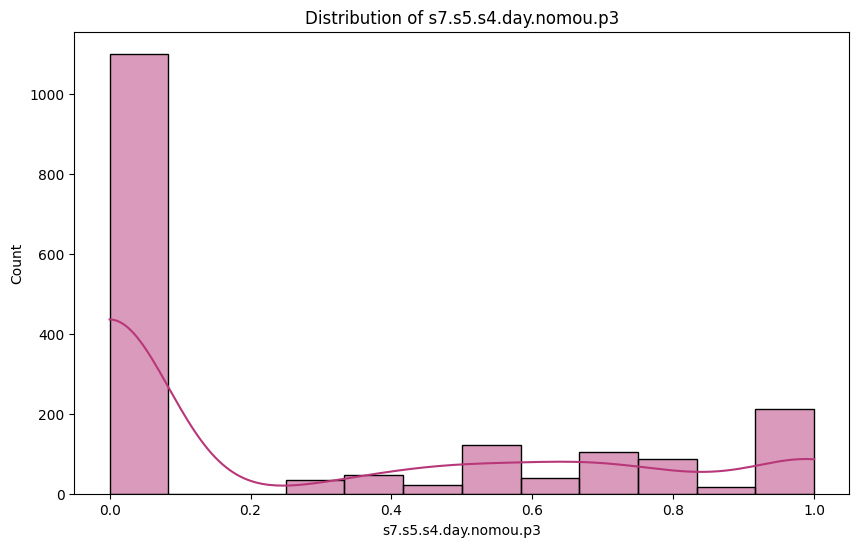

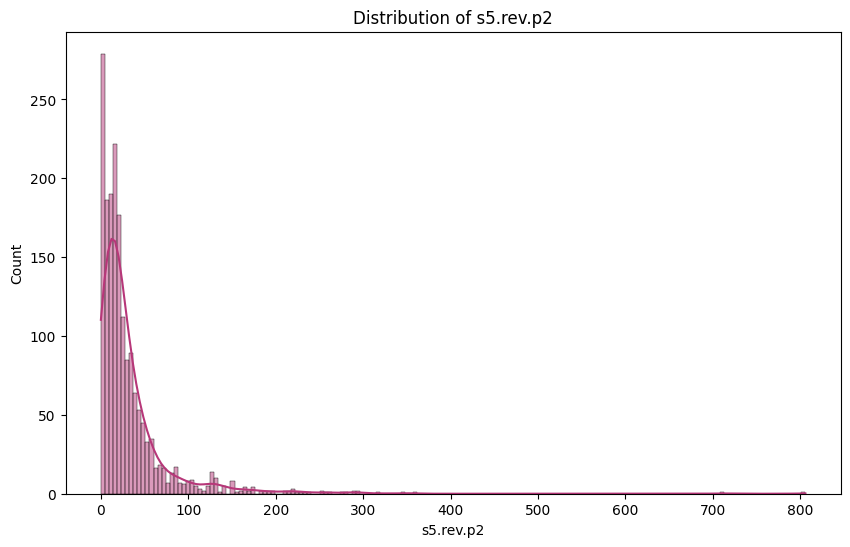

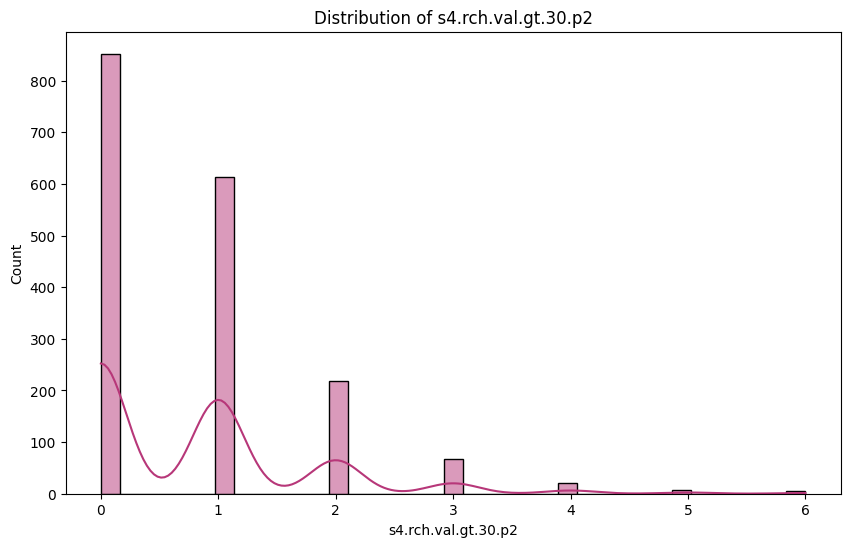

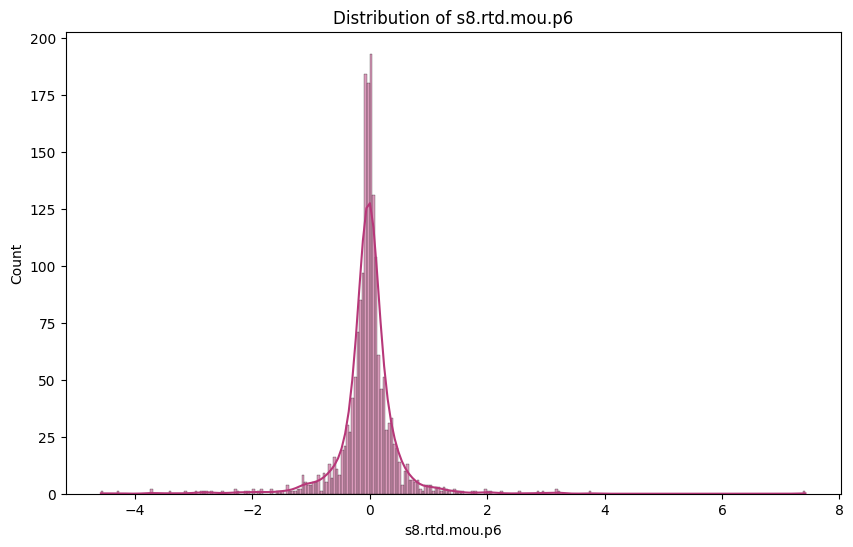

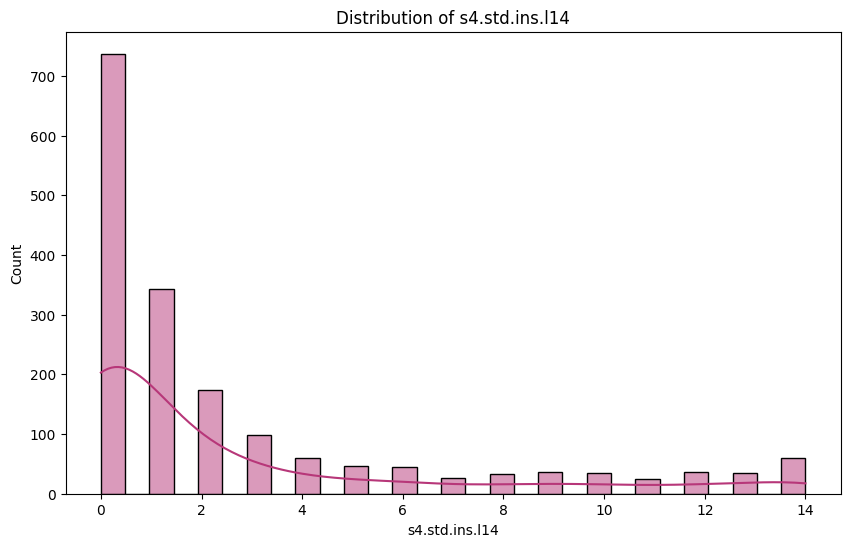

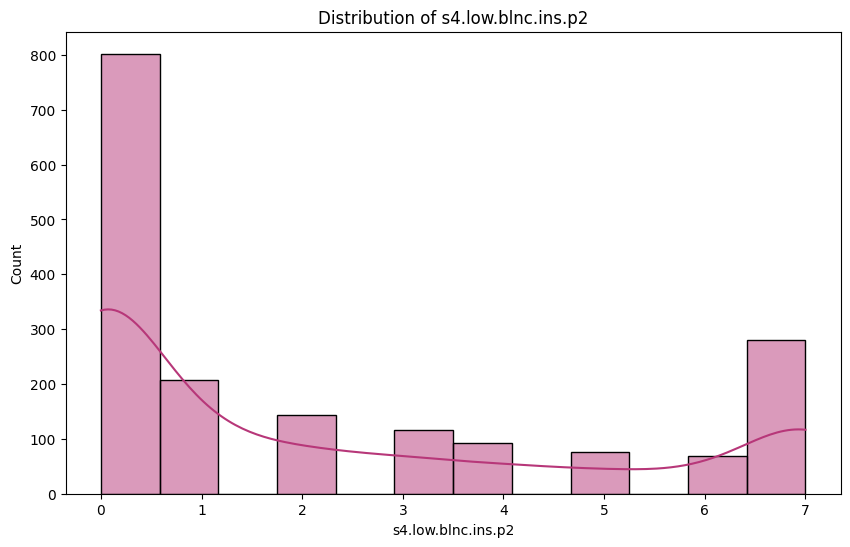

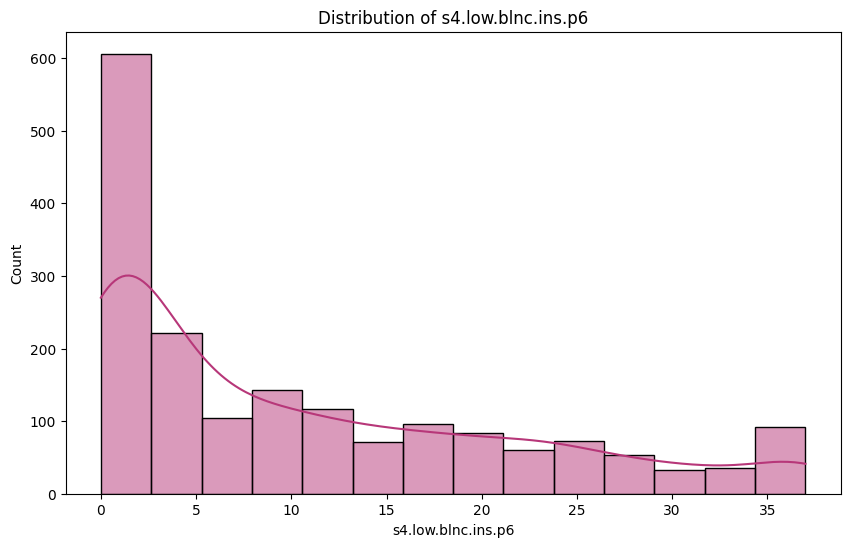

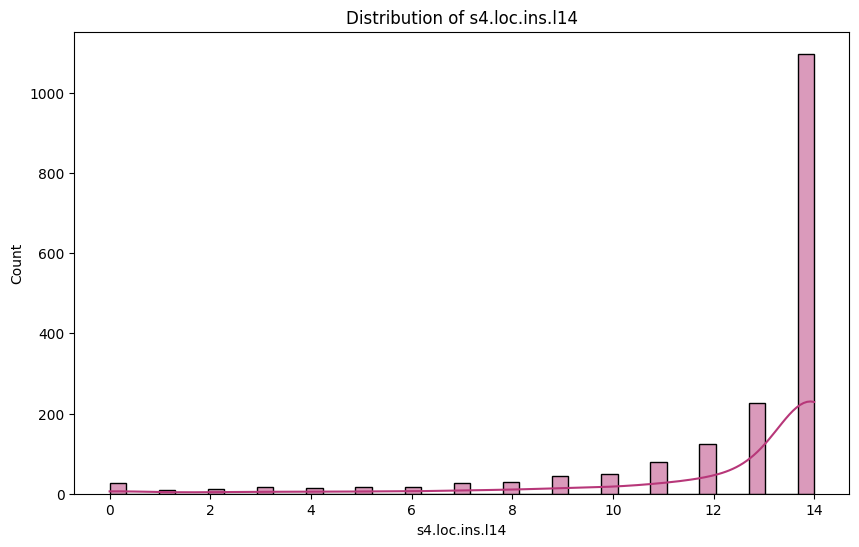

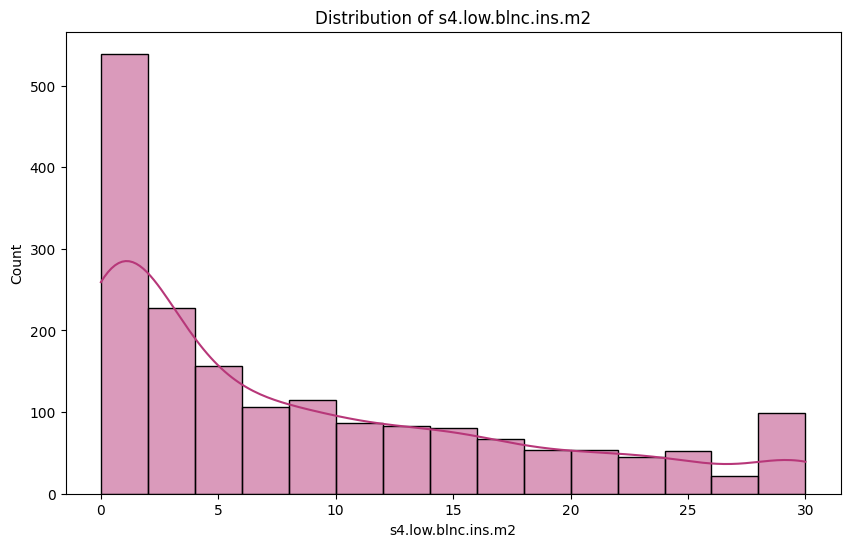

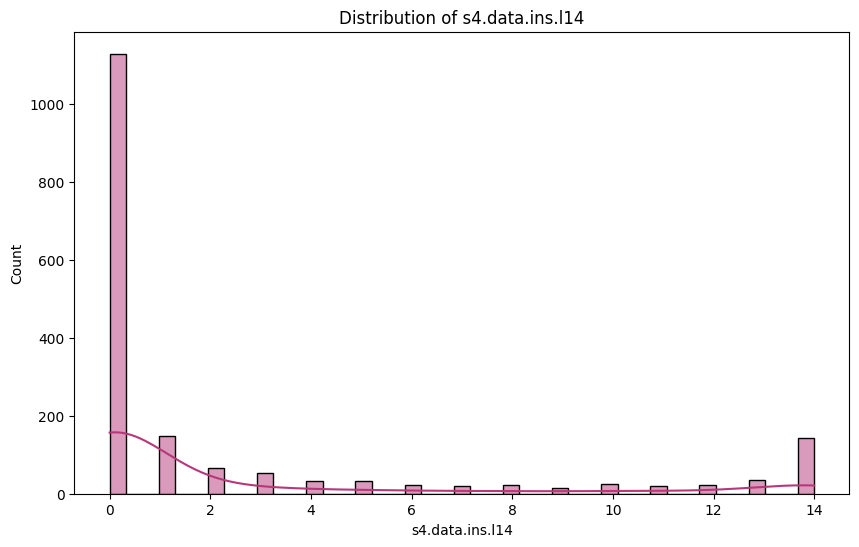

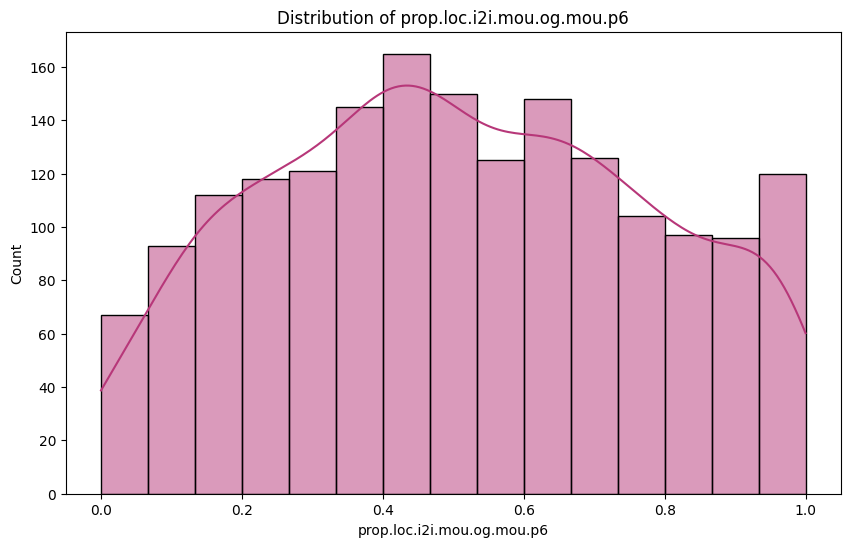

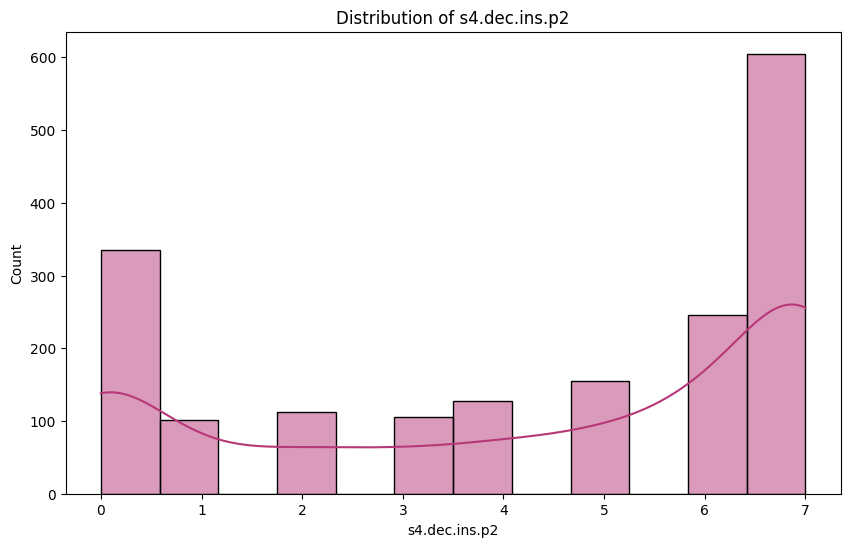

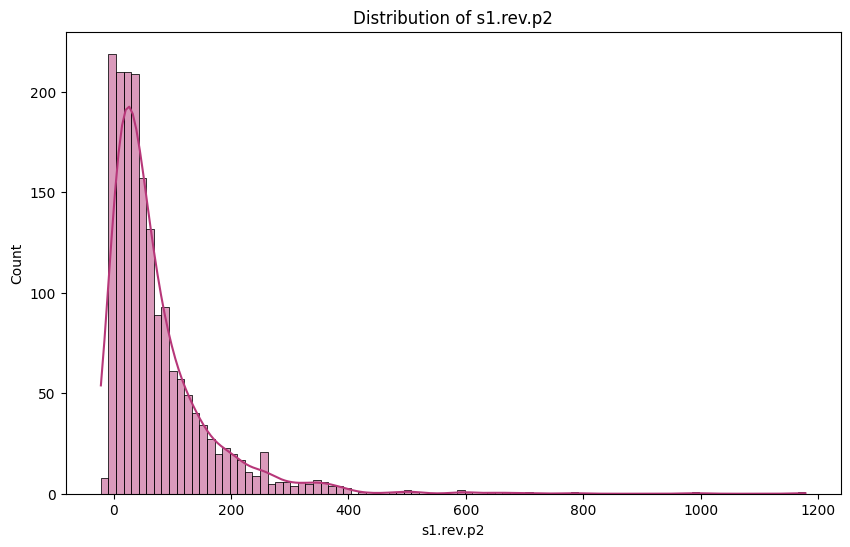

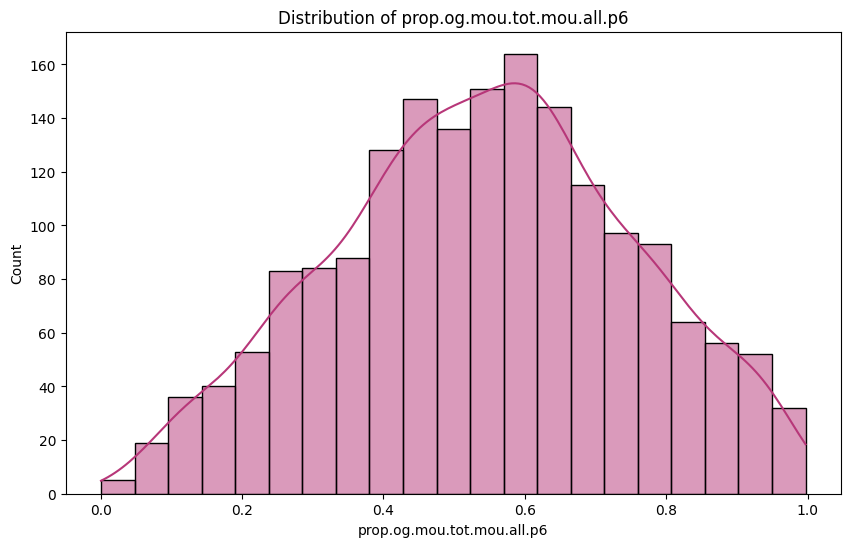

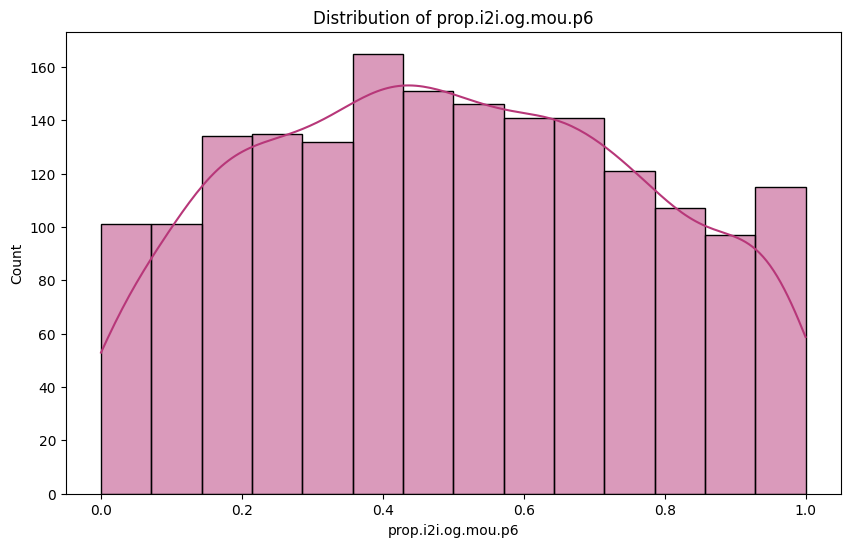

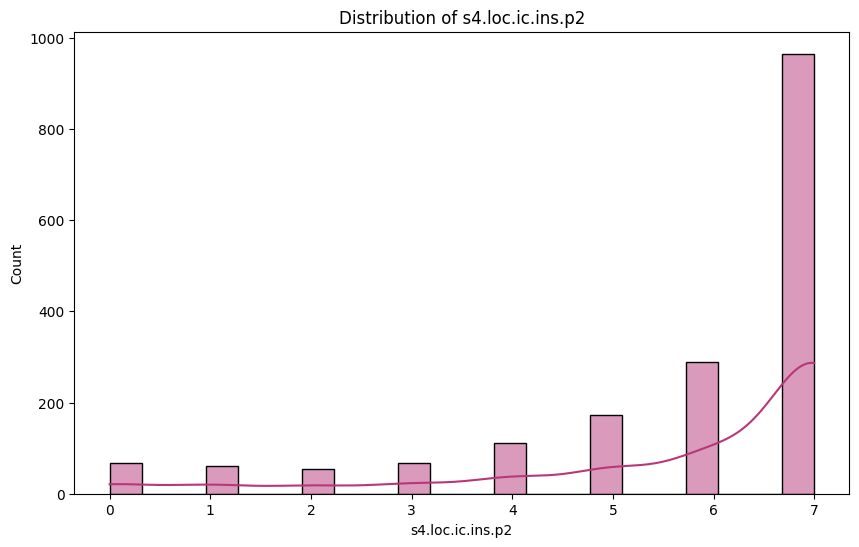

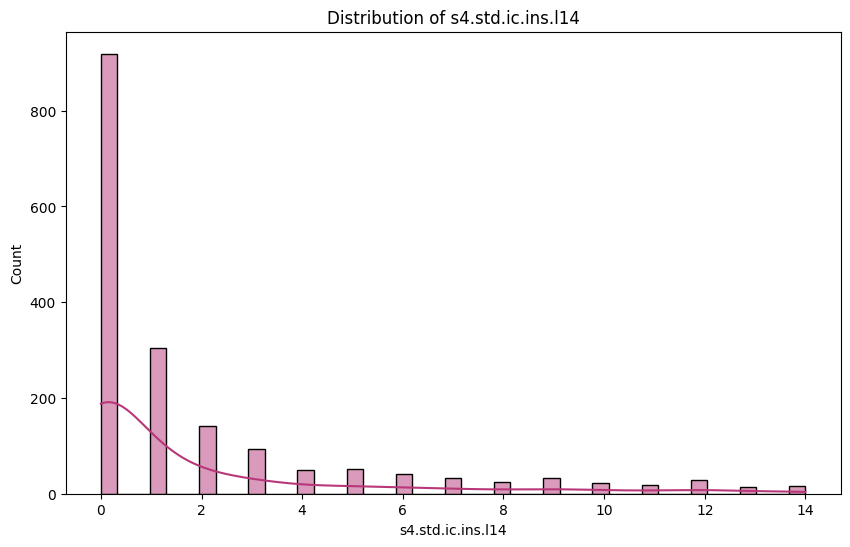

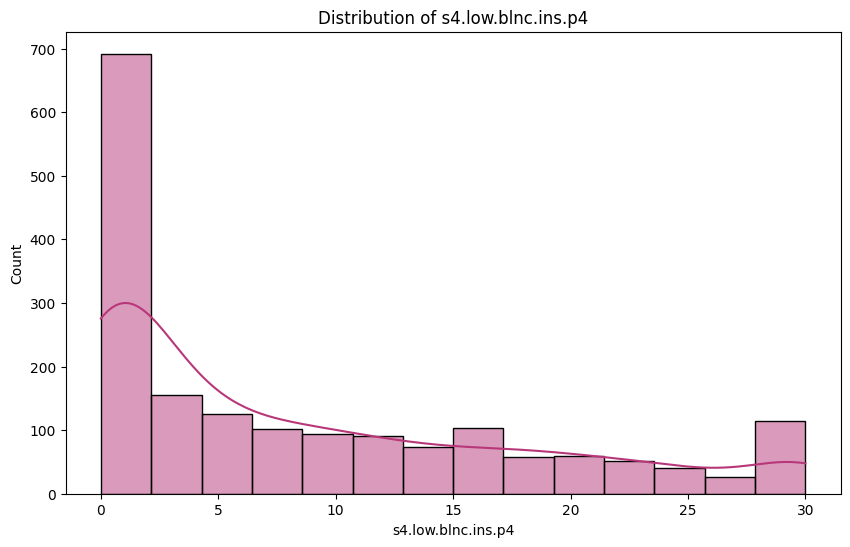

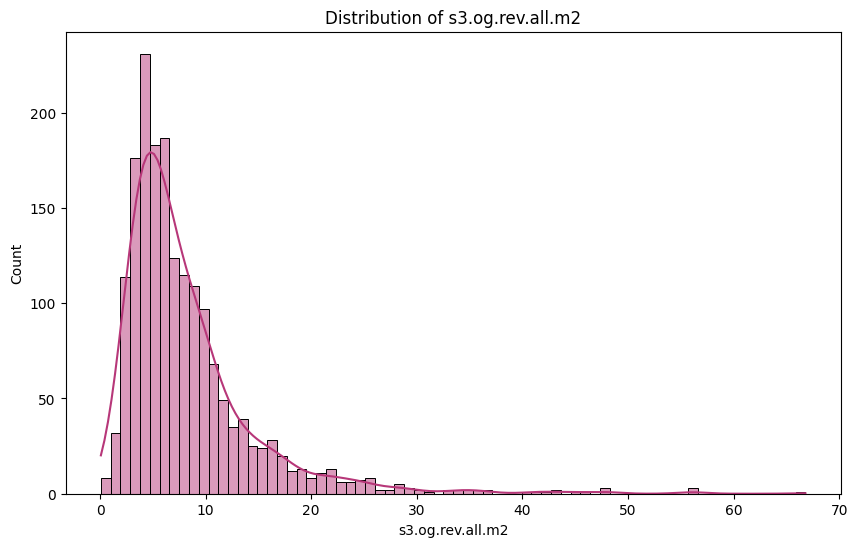

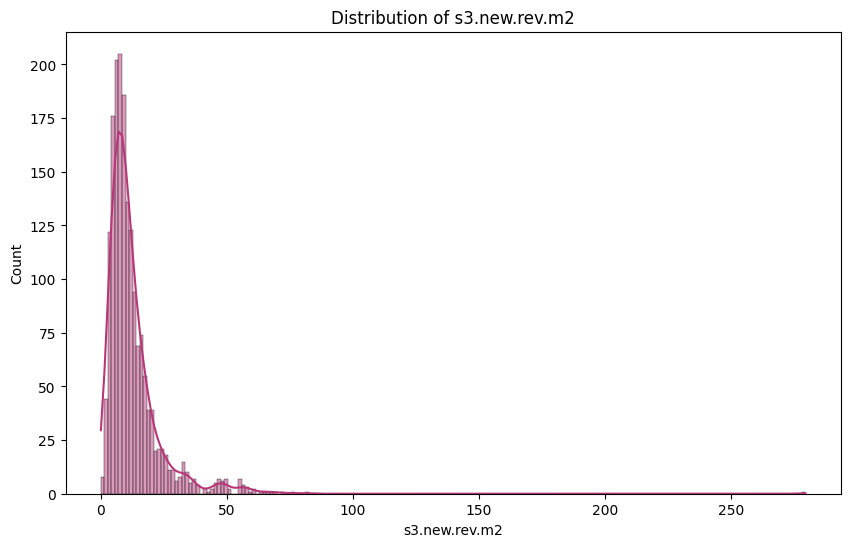

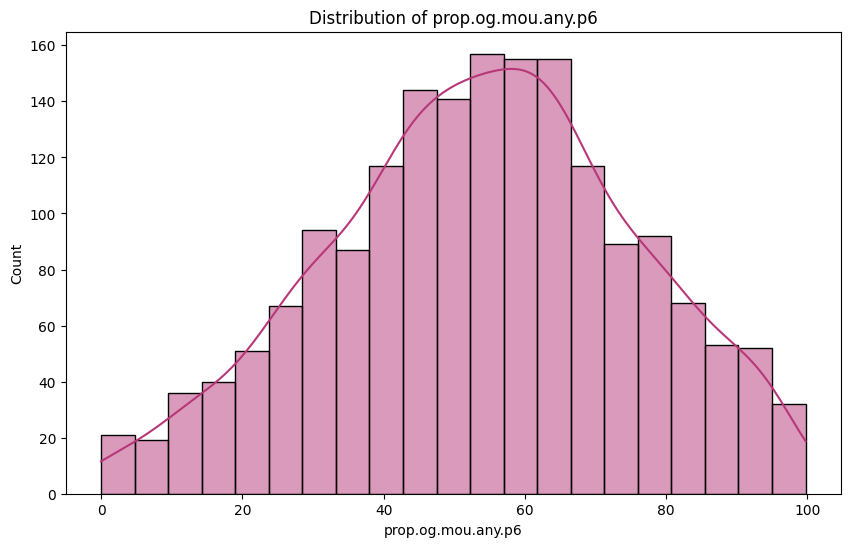

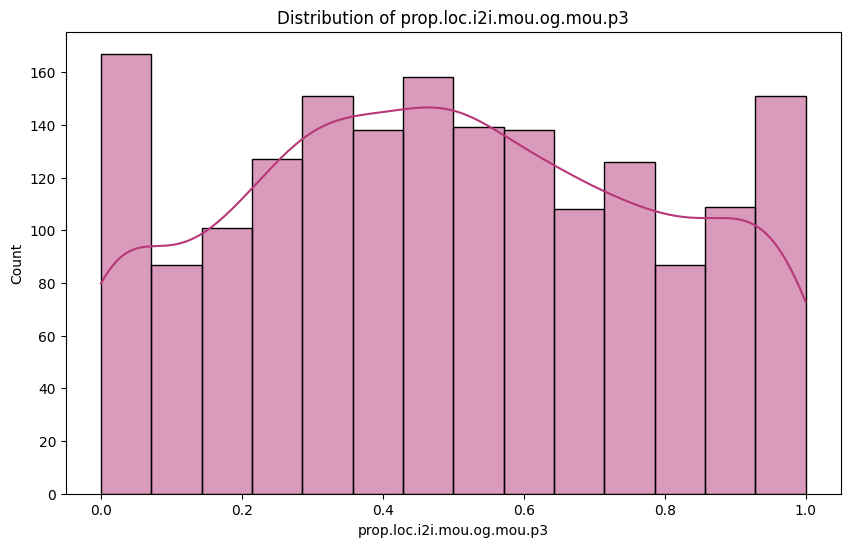

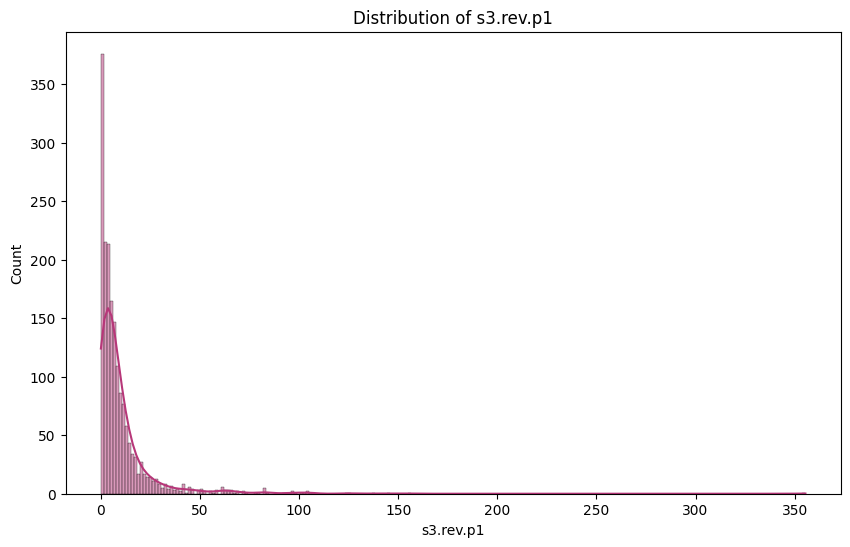

In [ ]:
# Distribution Plot
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col].dropna(), kde=True, color=sns.color_palette('magma', as_cmap=True)(0.5))
    plt.title(f'Distribution of {col}')
    plt.show()

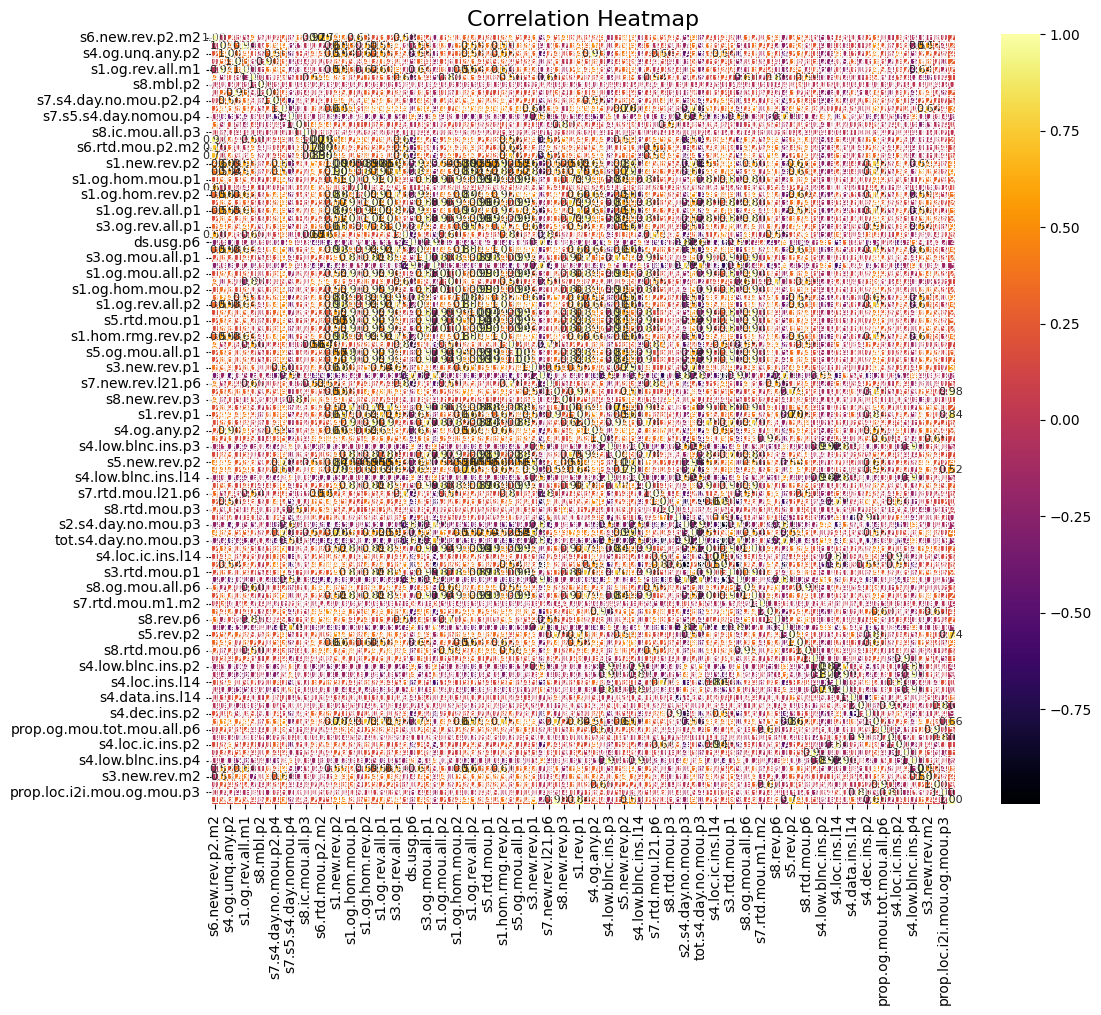

In [ ]:
# Step 7: Remove Highly Correlated Variables
# Compute the correlation matrix for numeric columns only
corr_matrix = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Remove highly correlated variables
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
data = data.drop(columns=[col for col in to_drop if col in data.columns])

In [ ]:
num_rows_after_outlier_treatment = data.shape[0]
print(f'Number of rows remaining after outlier treatment: {num_rows_after_outlier_treatment}')

Number of rows remaining after outlier treatment: 1787


# Step 8: Multicollinearity (VIF > 5)

In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

while True:
    vif_data = calculate_vif(data.select_dtypes(include=[np.number]))
    max_vif = vif_data['VIF'].max()
    if max_vif > 5:
        max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
        data = data.drop(columns=[max_vif_feature])
    else:
        break

In [ ]:
print(data.columns.tolist())

['s6.new.rev.p2.m2', 's4.usg.ins.p2', 's4.og.unq.any.p2', 's2.rch.val.p6', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target', 's6.rtd.mou.p2.m2', 's1.og.hom.mou.p1', 's7.rev.p2.p6', 'ds.usg.p6', 's4.day.no.mou.p2', 's3.new.rev.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.rev.p1', 's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's4.loc.og.ins.p1', 's4.low.blnc.ins.p3', 's8.rtd.mou.p3', 's4.loc.og.ins.p2', 's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's5.rev.p2', 's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.data.ins.l14', 'prop.loc.i2i.mou.og.mou.p6', 's3.new.rev.m2']


In [ ]:
num_rows_after_outlier_treatment = data.shape[0]
num_cols = data.shape[1]
print(f'Number of rows remaining after treatment: {num_rows_after_outlier_treatment}')
print(f'Number of columns remaining after treatment: {num_cols}')

Number of rows remaining after treatment: 1787
Number of columns remaining after treatment: 35


In [ ]:
num_cols = data.shape[1]
print(f'Number of columns remaining after treatment: {num_cols}')

Number of columns remaining after treatment: 35


**Logistic regression**

Accuracy: 0.79
Confusion Matrix:
[[221  24]
 [ 50  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       245
           1       0.72      0.56      0.63       113

    accuracy                           0.79       358
   macro avg       0.77      0.73      0.74       358
weighted avg       0.79      0.79      0.79       358



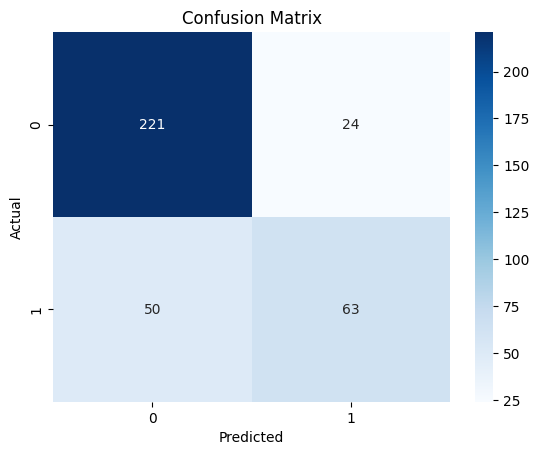

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Hyper parameter tuning**

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.79
Confusion Matrix:
[[221  24]
 [ 50  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       245
           1       0.72      0.56      0.63       113

    accuracy                           0.79       358
   macro avg       0.77      0.73      0.74       358
weighted avg       0.79      0.79      0.79       358



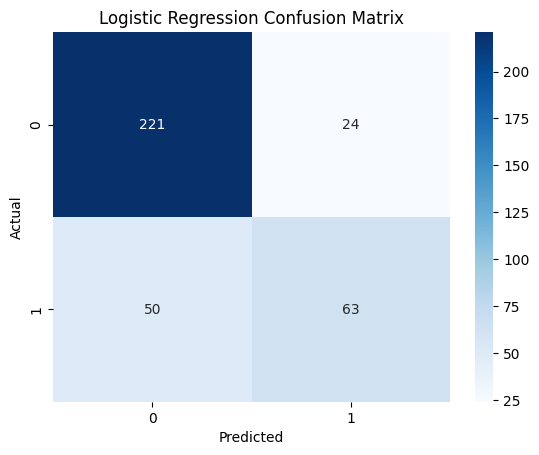

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.2, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}


# Perform Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Extract the best model
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('Classification Report:')
print(class_report_lr)

# Plot the confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Random Forest and Decision Tree - Before Hyperparameter tuning**

Decision Tree Accuracy: 0.72
Decision Tree Confusion Matrix:
[[185  60]
 [ 40  73]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       245
           1       0.55      0.65      0.59       113

    accuracy                           0.72       358
   macro avg       0.69      0.70      0.69       358
weighted avg       0.74      0.72      0.73       358



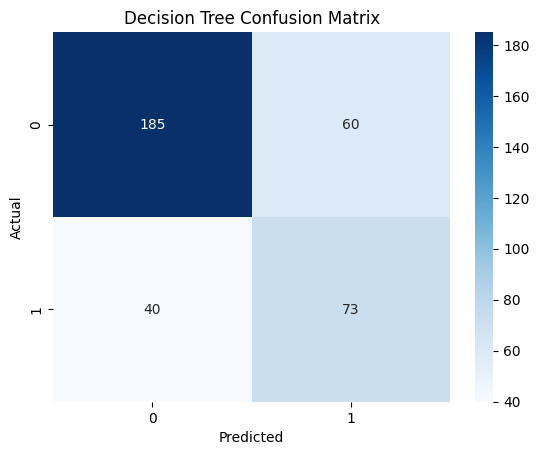

Random Forest Accuracy: 0.81
Random Forest Confusion Matrix:
[[222  23]
 [ 45  68]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       245
           1       0.75      0.60      0.67       113

    accuracy                           0.81       358
   macro avg       0.79      0.75      0.77       358
weighted avg       0.80      0.81      0.80       358



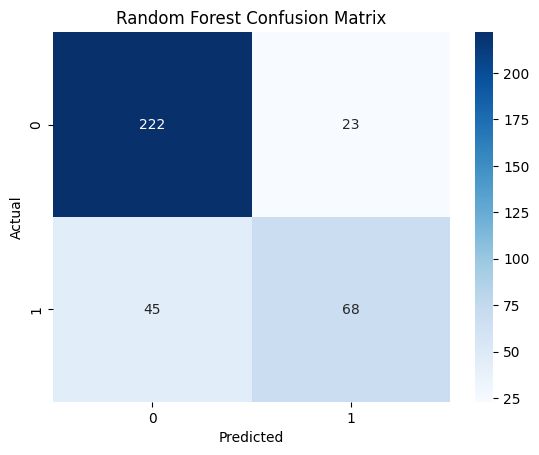

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print('Decision Tree Confusion Matrix:')
print(conf_matrix_dt)
print('Decision Tree Classification Report:')
print(class_report_dt)

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:')
print(class_report_rf)

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Accuracy: 0.80
Confusion Matrix:
[[219  26]
 [ 44  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       245
           1       0.73      0.61      0.66       113

    accuracy                           0.80       358
   macro avg       0.78      0.75      0.76       358
weighted avg       0.80      0.80      0.80       358



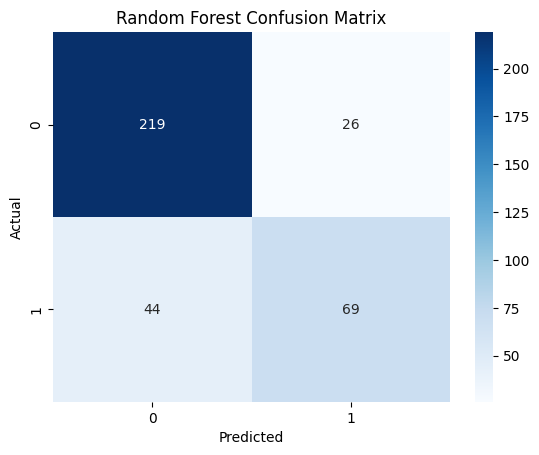

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Decision Tree Accuracy: 0.76
Confusion Matrix:
[[208  37]
 [ 50  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       245
           1       0.63      0.56      0.59       113

    accuracy                           0.76       358
   macro avg       0.72      0.70      0.71       358
weighted avg       0.75      0.76      0.75       358



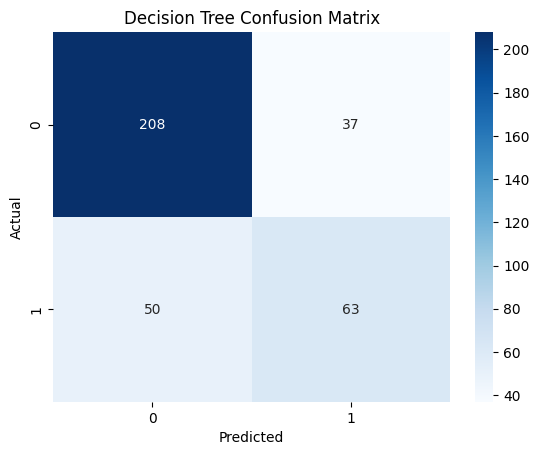

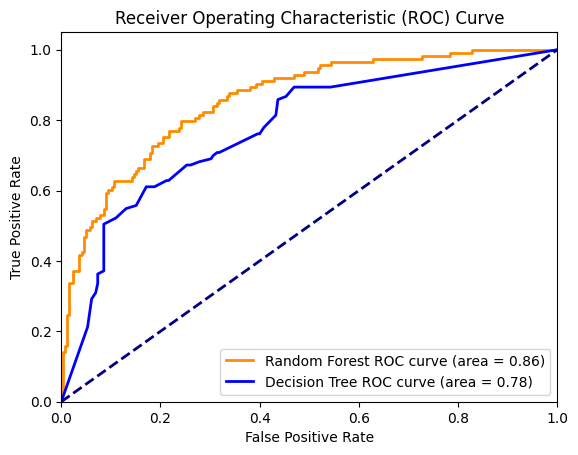

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame
# Define the target and features
target = 'target'
X = data.drop(columns=[target, 'target'])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Extract the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

# Plot the Random Forest confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Extract the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print('Confusion Matrix:')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

# Plot the Decision Tree confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curves for both models
y_pred_prob_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Available columns in the DataFrame:
Index(['s6.new.rev.p2.m2', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's7.s4.day.no.mou.p2.p4', 's7.s5.s4.day.nomou.p4', 's8.og.rev.p3',
       's8.ic.mou.all.p3', 'target', 's6.rtd.mou.p2.m2', 's1.og.hom.mou.p1',
       's7.rev.p2.p6', 'ds.usg.p6', 's4.day.no.mou.p2', 's3.new.rev.p1',
       's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.rev.p1',
       's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's4.loc.og.ins.p1',
       's4.low.blnc.ins.p3', 's8.rtd.mou.p3', 's4.loc.og.ins.p2',
       's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's5.rev.p2',
       's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.data.ins.l14',
       'prop.loc.i2i.mou.og.mou.p6', 's3.new.rev.m2'],
      dtype='object')
Missing features: ['s1.new.rev.m1', 's3.og.rev.4db.p5', 's3.new.rev.4db.p5', 's1.og.rev.all.m1']
Corrected feature list: ['s6.new.rev.p2.m2', 's4.usg.ins.p2', 's4.og.unq.any.p2', 's2.rch.val.p6', 's

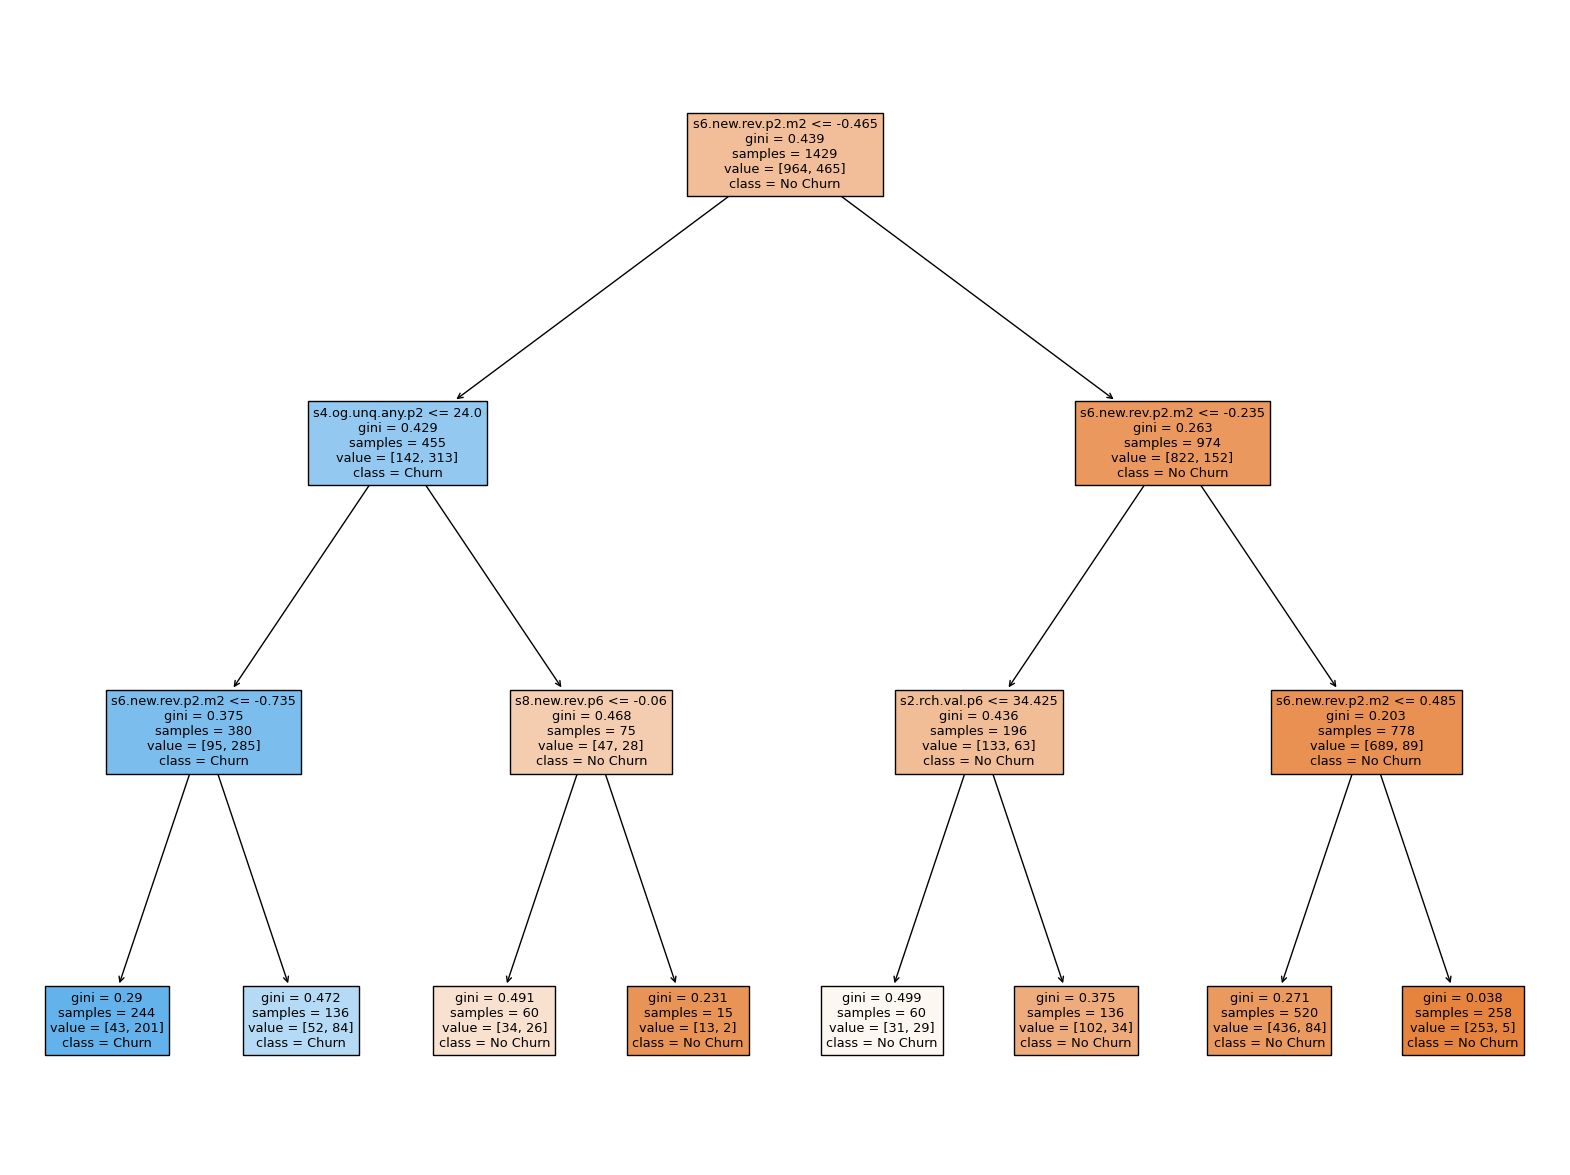

In [ ]:
# Print the columns of the DataFrame
print("Available columns in the DataFrame:")
print(data.columns)

# Identify and print missing features
missing_features = [feature for feature in selected_features if feature not in data.columns]
print("Missing features:", missing_features)

# If any features are missing, you need to either correct them or remove them from the selection
corrected_features = [feature for feature in selected_features if feature in data.columns]
print("Corrected feature list:", corrected_features)

# Use the corrected features to proceed
X = data[corrected_features]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier with constraints to keep the tree small and efficient
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=corrected_features, class_names=['No Churn', 'Churn'], filled=True)
plt.show()
